
# YOLOv11 BCDD


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv11

In [ ]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="tPLAu1v9TRdd1eQ2soYk")
project = rf.workspace("joseph-nelson").project("bccd")
version = project.version(4)
dataset = version.download("yolov11")



/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BCCD-4 in yolov11:: 100%|██████████| 1760/1760 [00:00<00:00, 2633.69it/s]


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=5 imgsz=520 plots=True

/content
Ultralytics 8.3.118 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/BCCD-4/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=520, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml			 PR_curve.png	   val_batch0_labels.jpg
confusion_matrix_normalized.png  R_curve.png	   val_batch0_pred.jpg
confusion_matrix.png		 results.csv	   val_batch1_labels.jpg
F1_curve.png			 results.png	   val_batch1_pred.jpg
labels_correlogram.jpg		 train_batch0.jpg  val_batch2_labels.jpg
labels.jpg			 train_batch1.jpg  val_batch2_pred.jpg
P_curve.png			 train_batch2.jpg  weights


/content


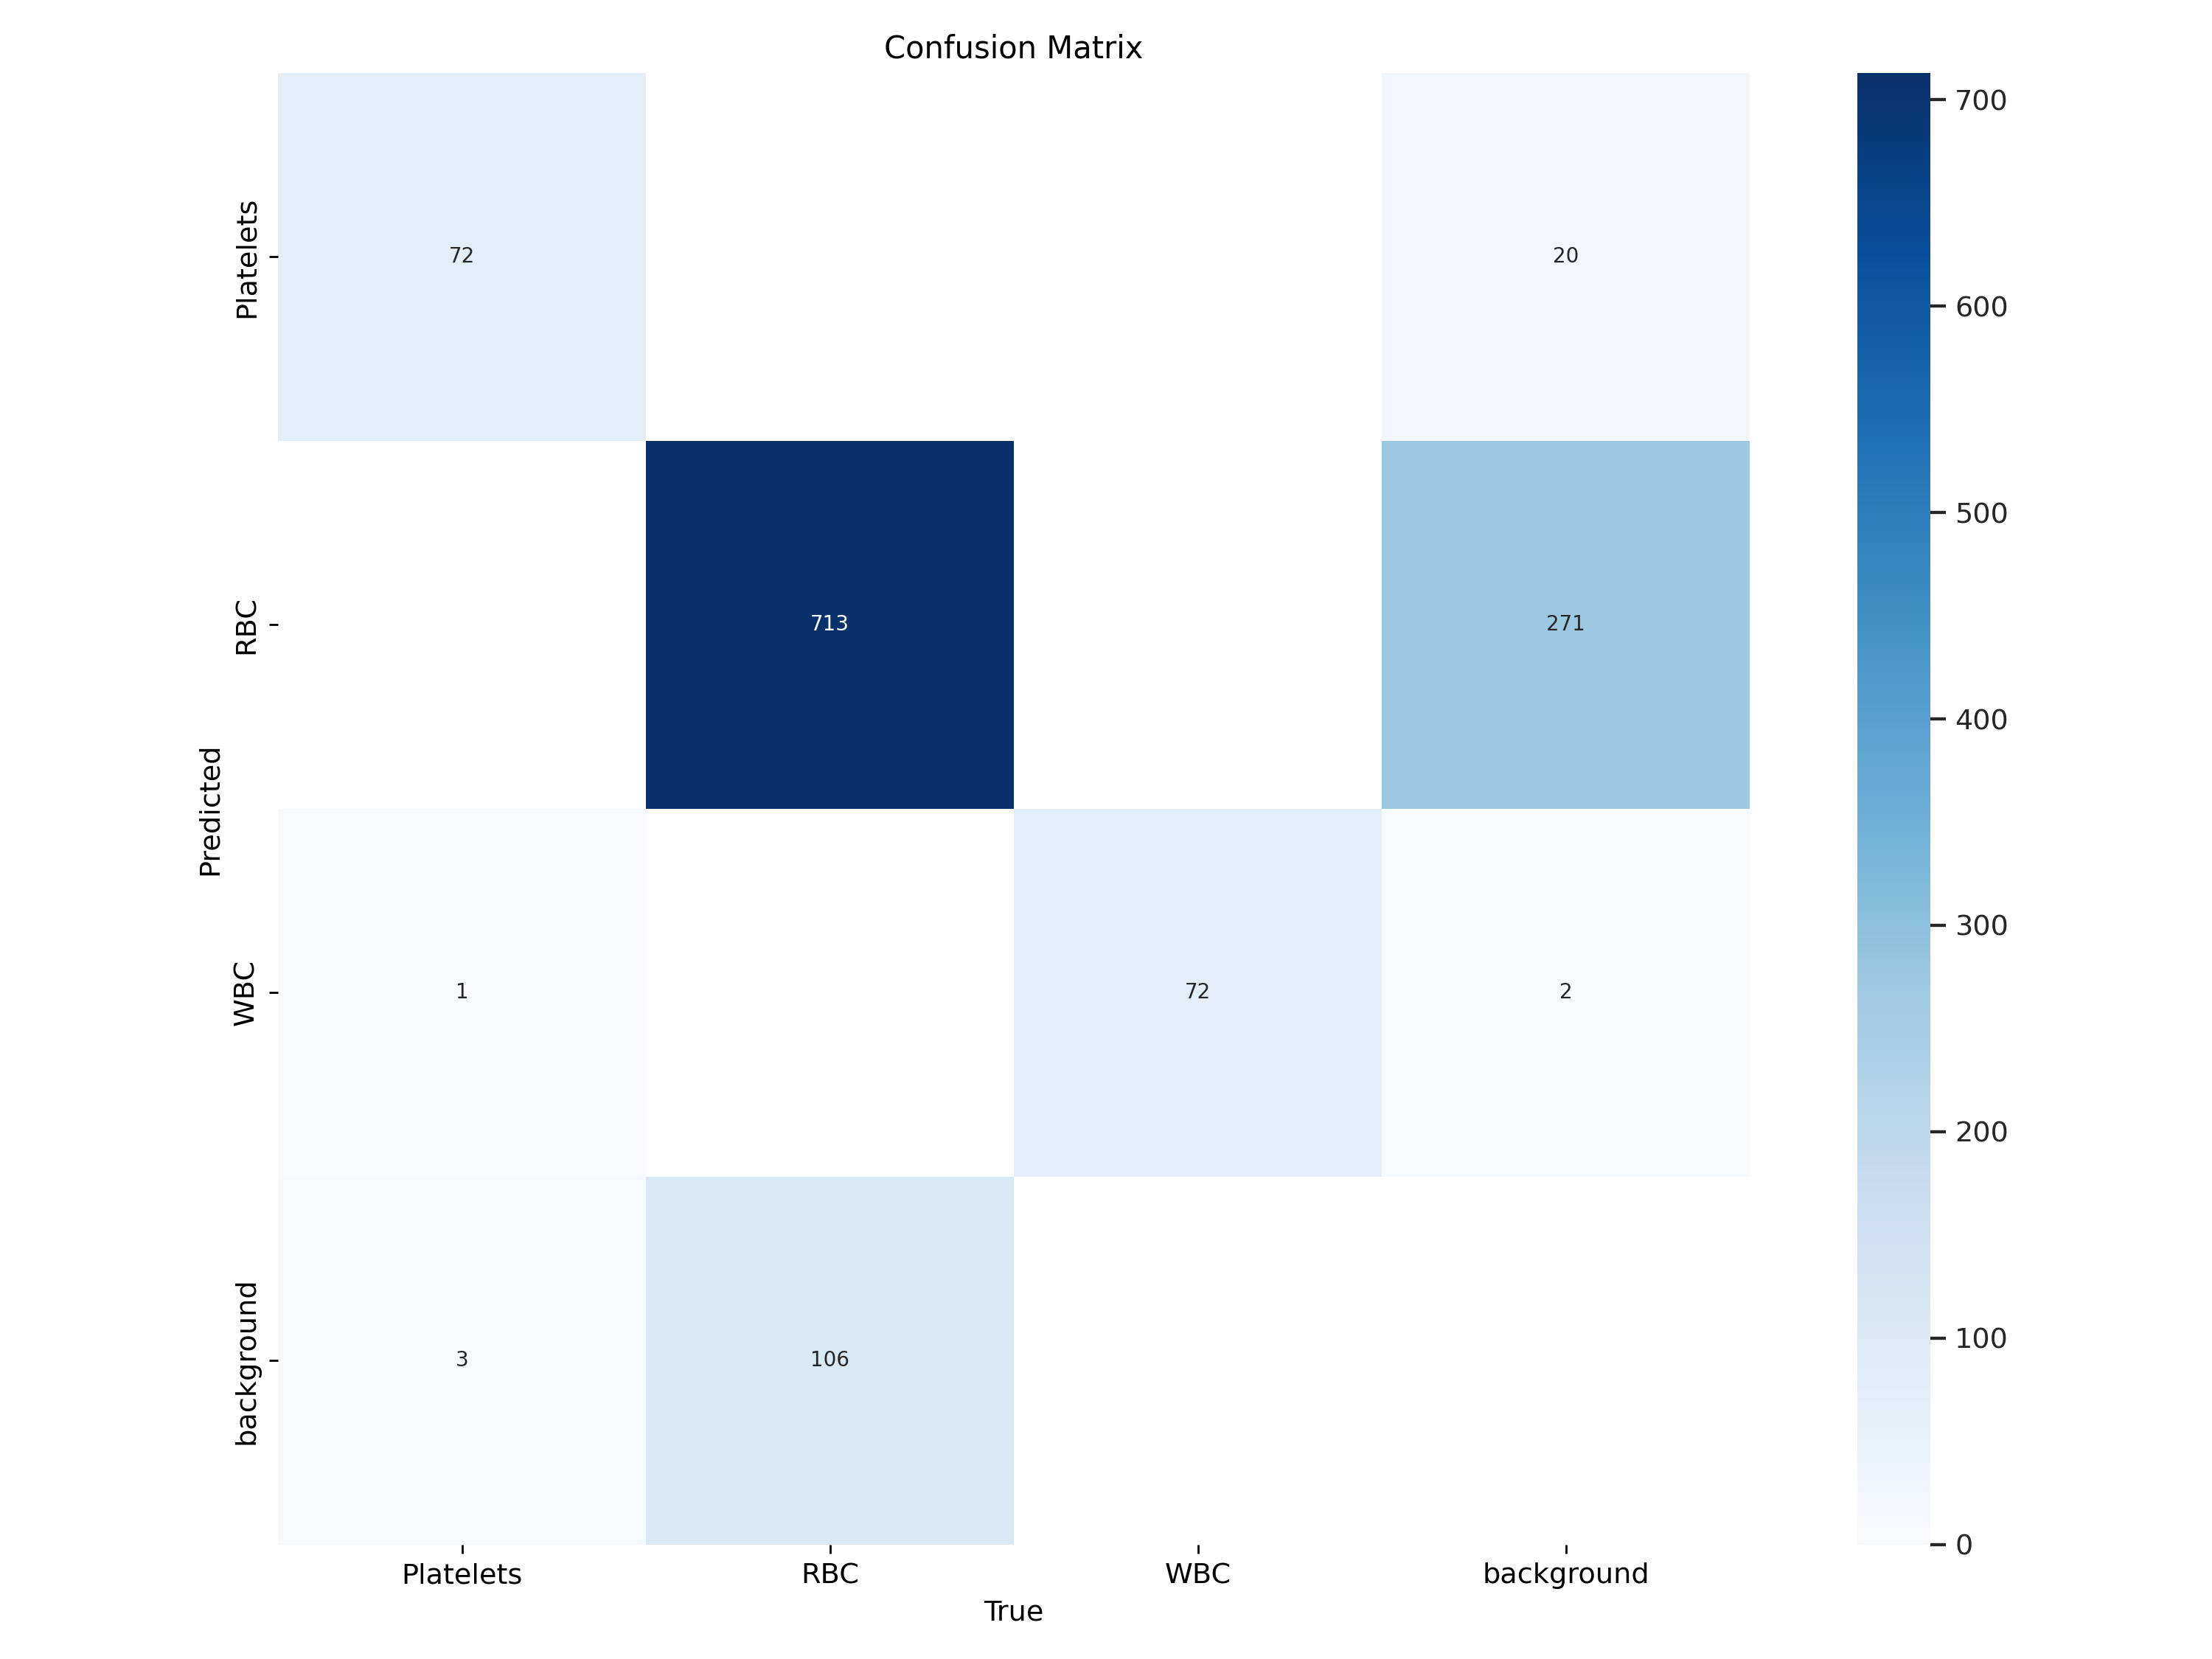

In [ ]:
from IPython.display import Image
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


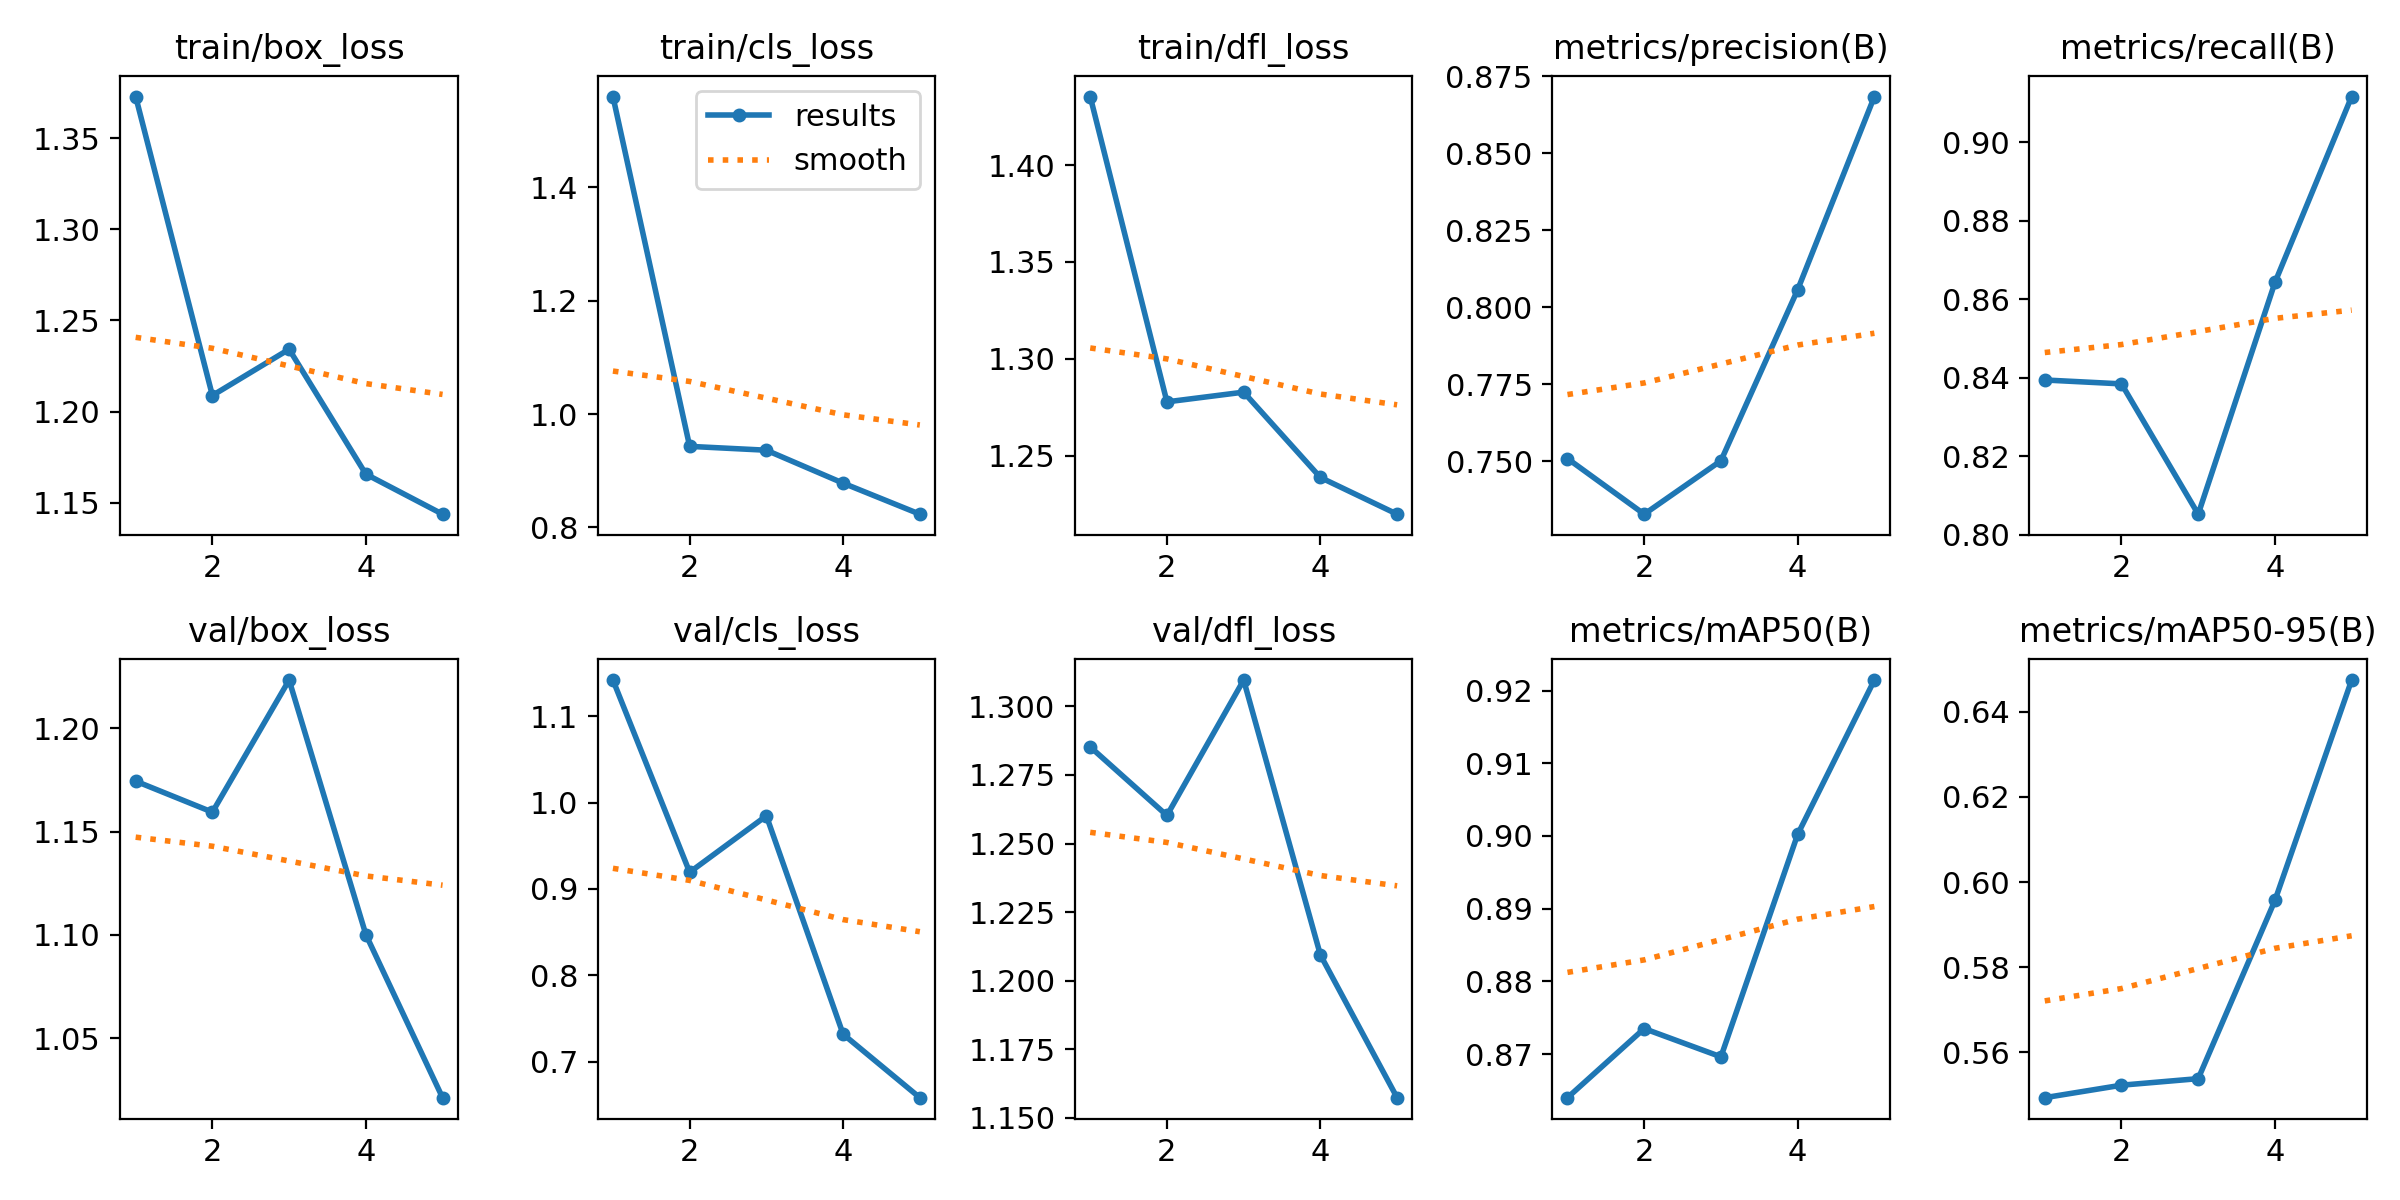

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

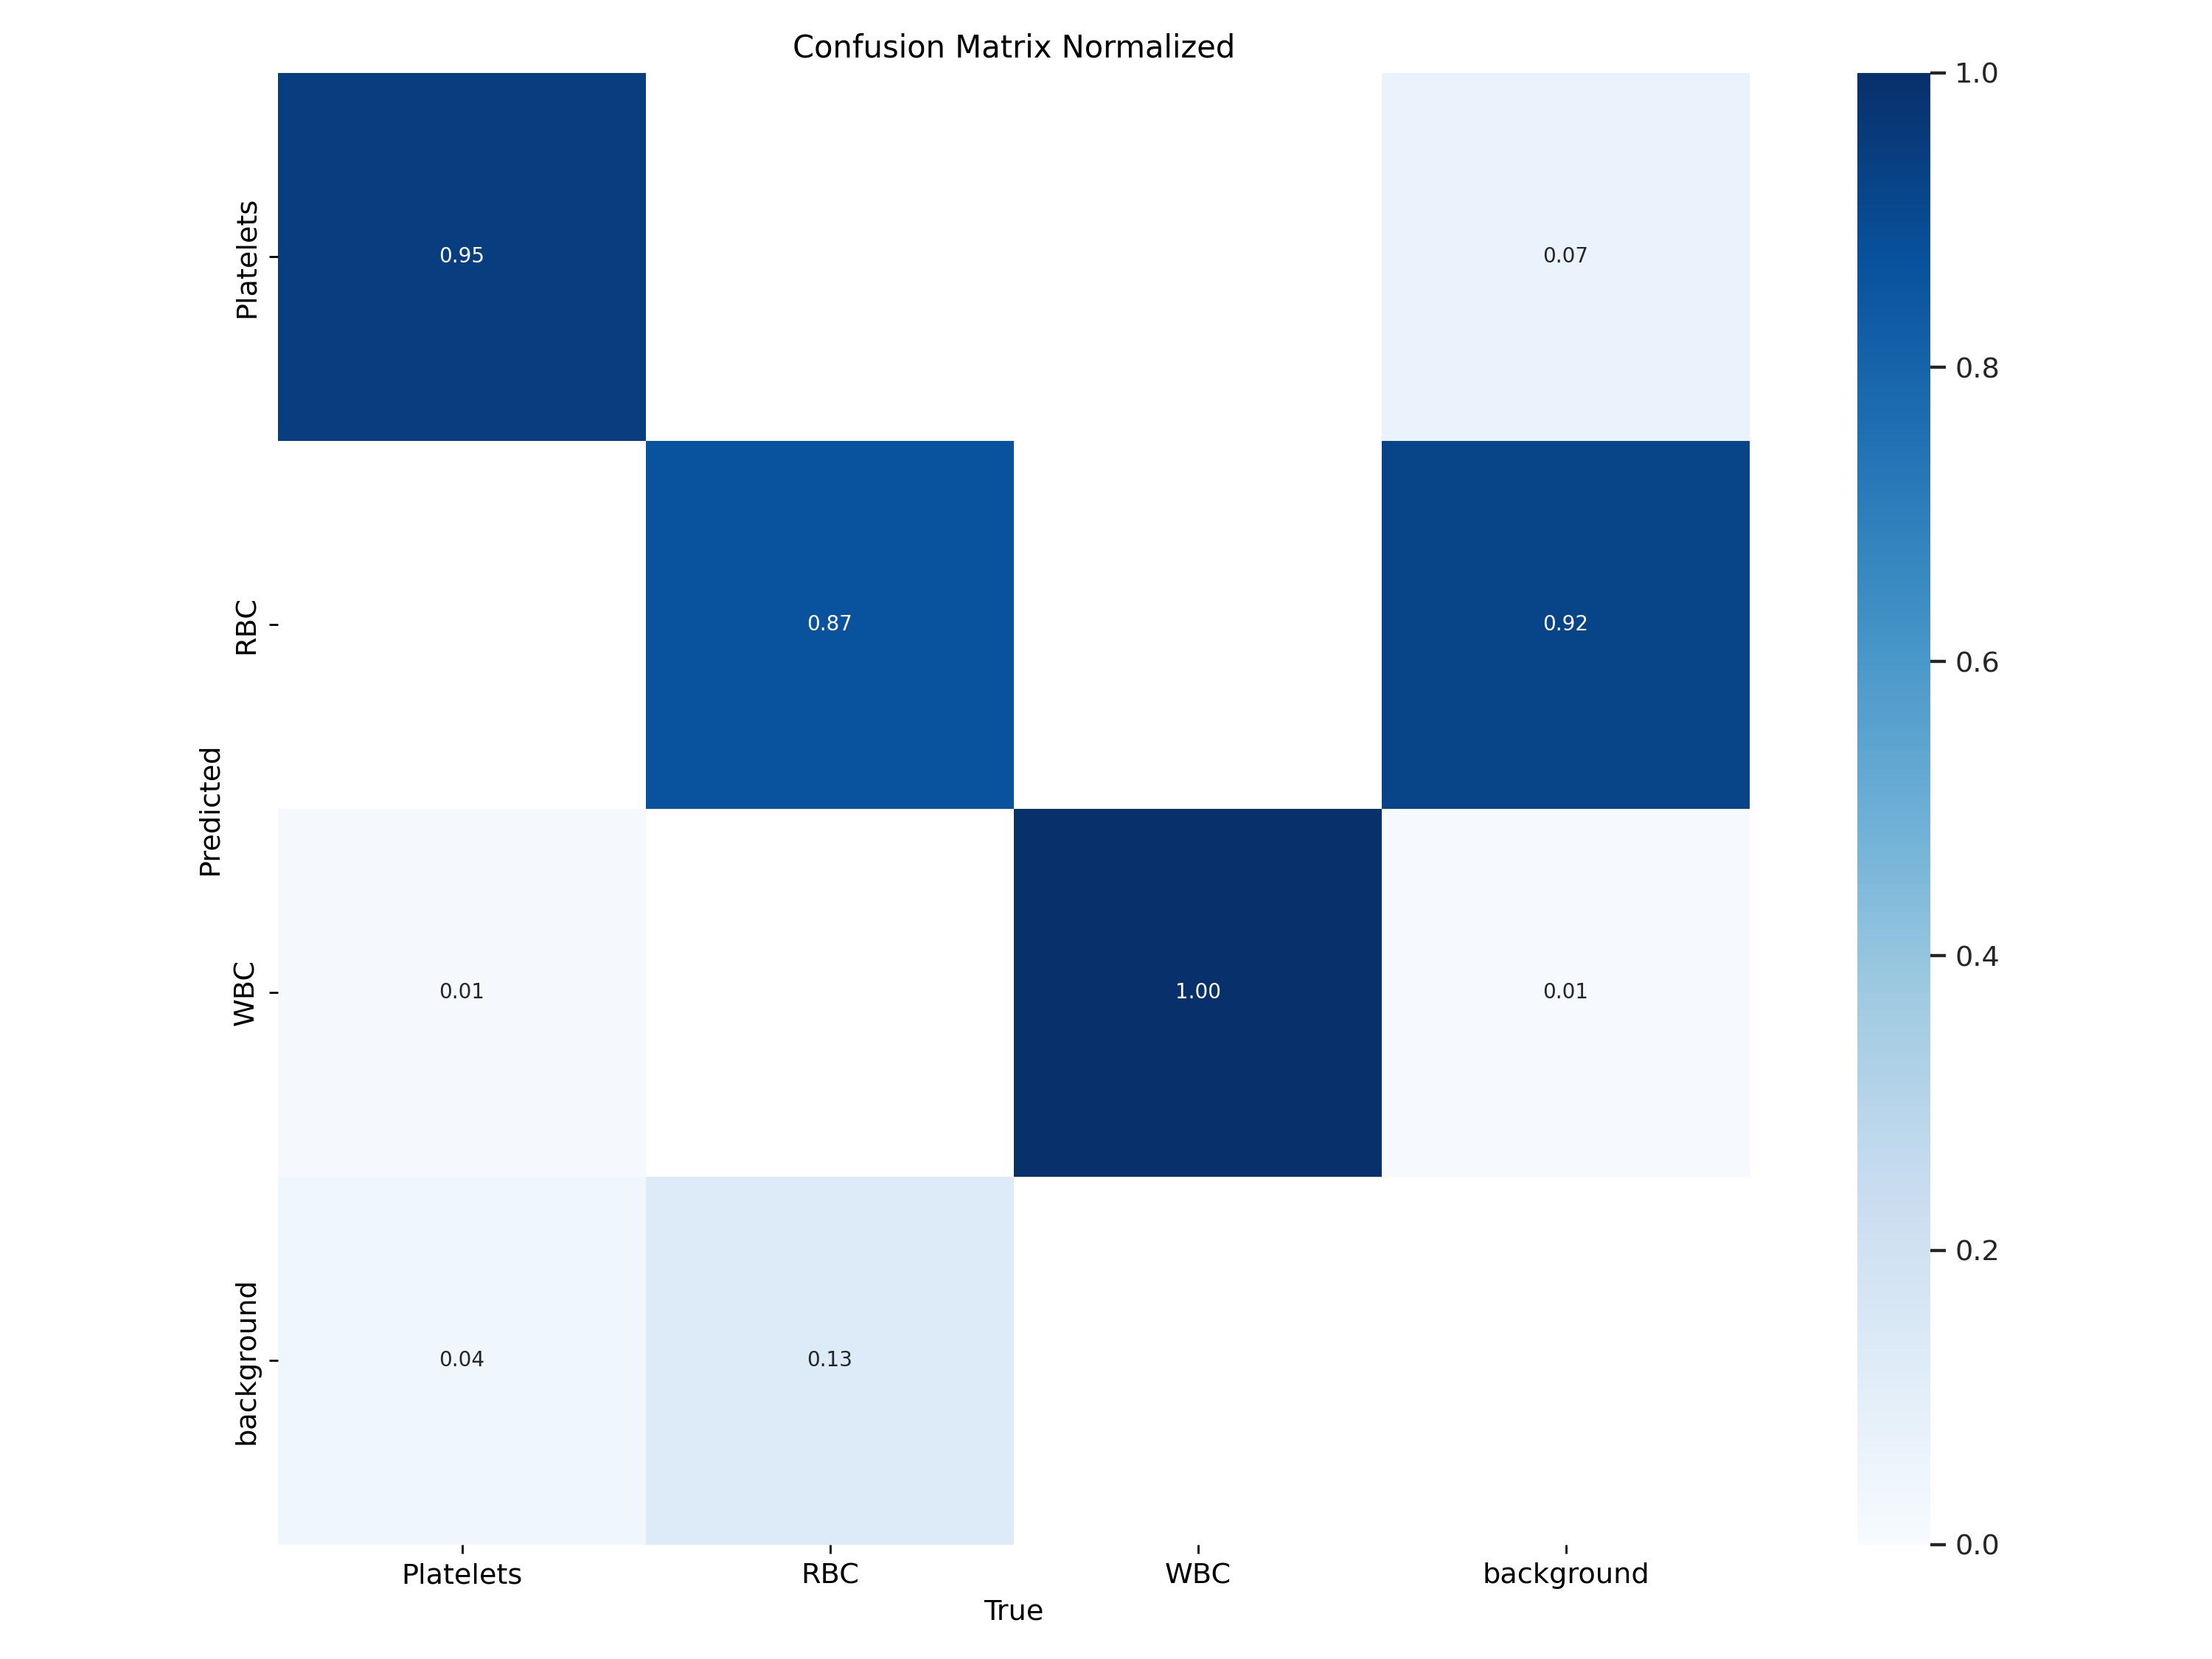

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix_normalized.png', width=600)

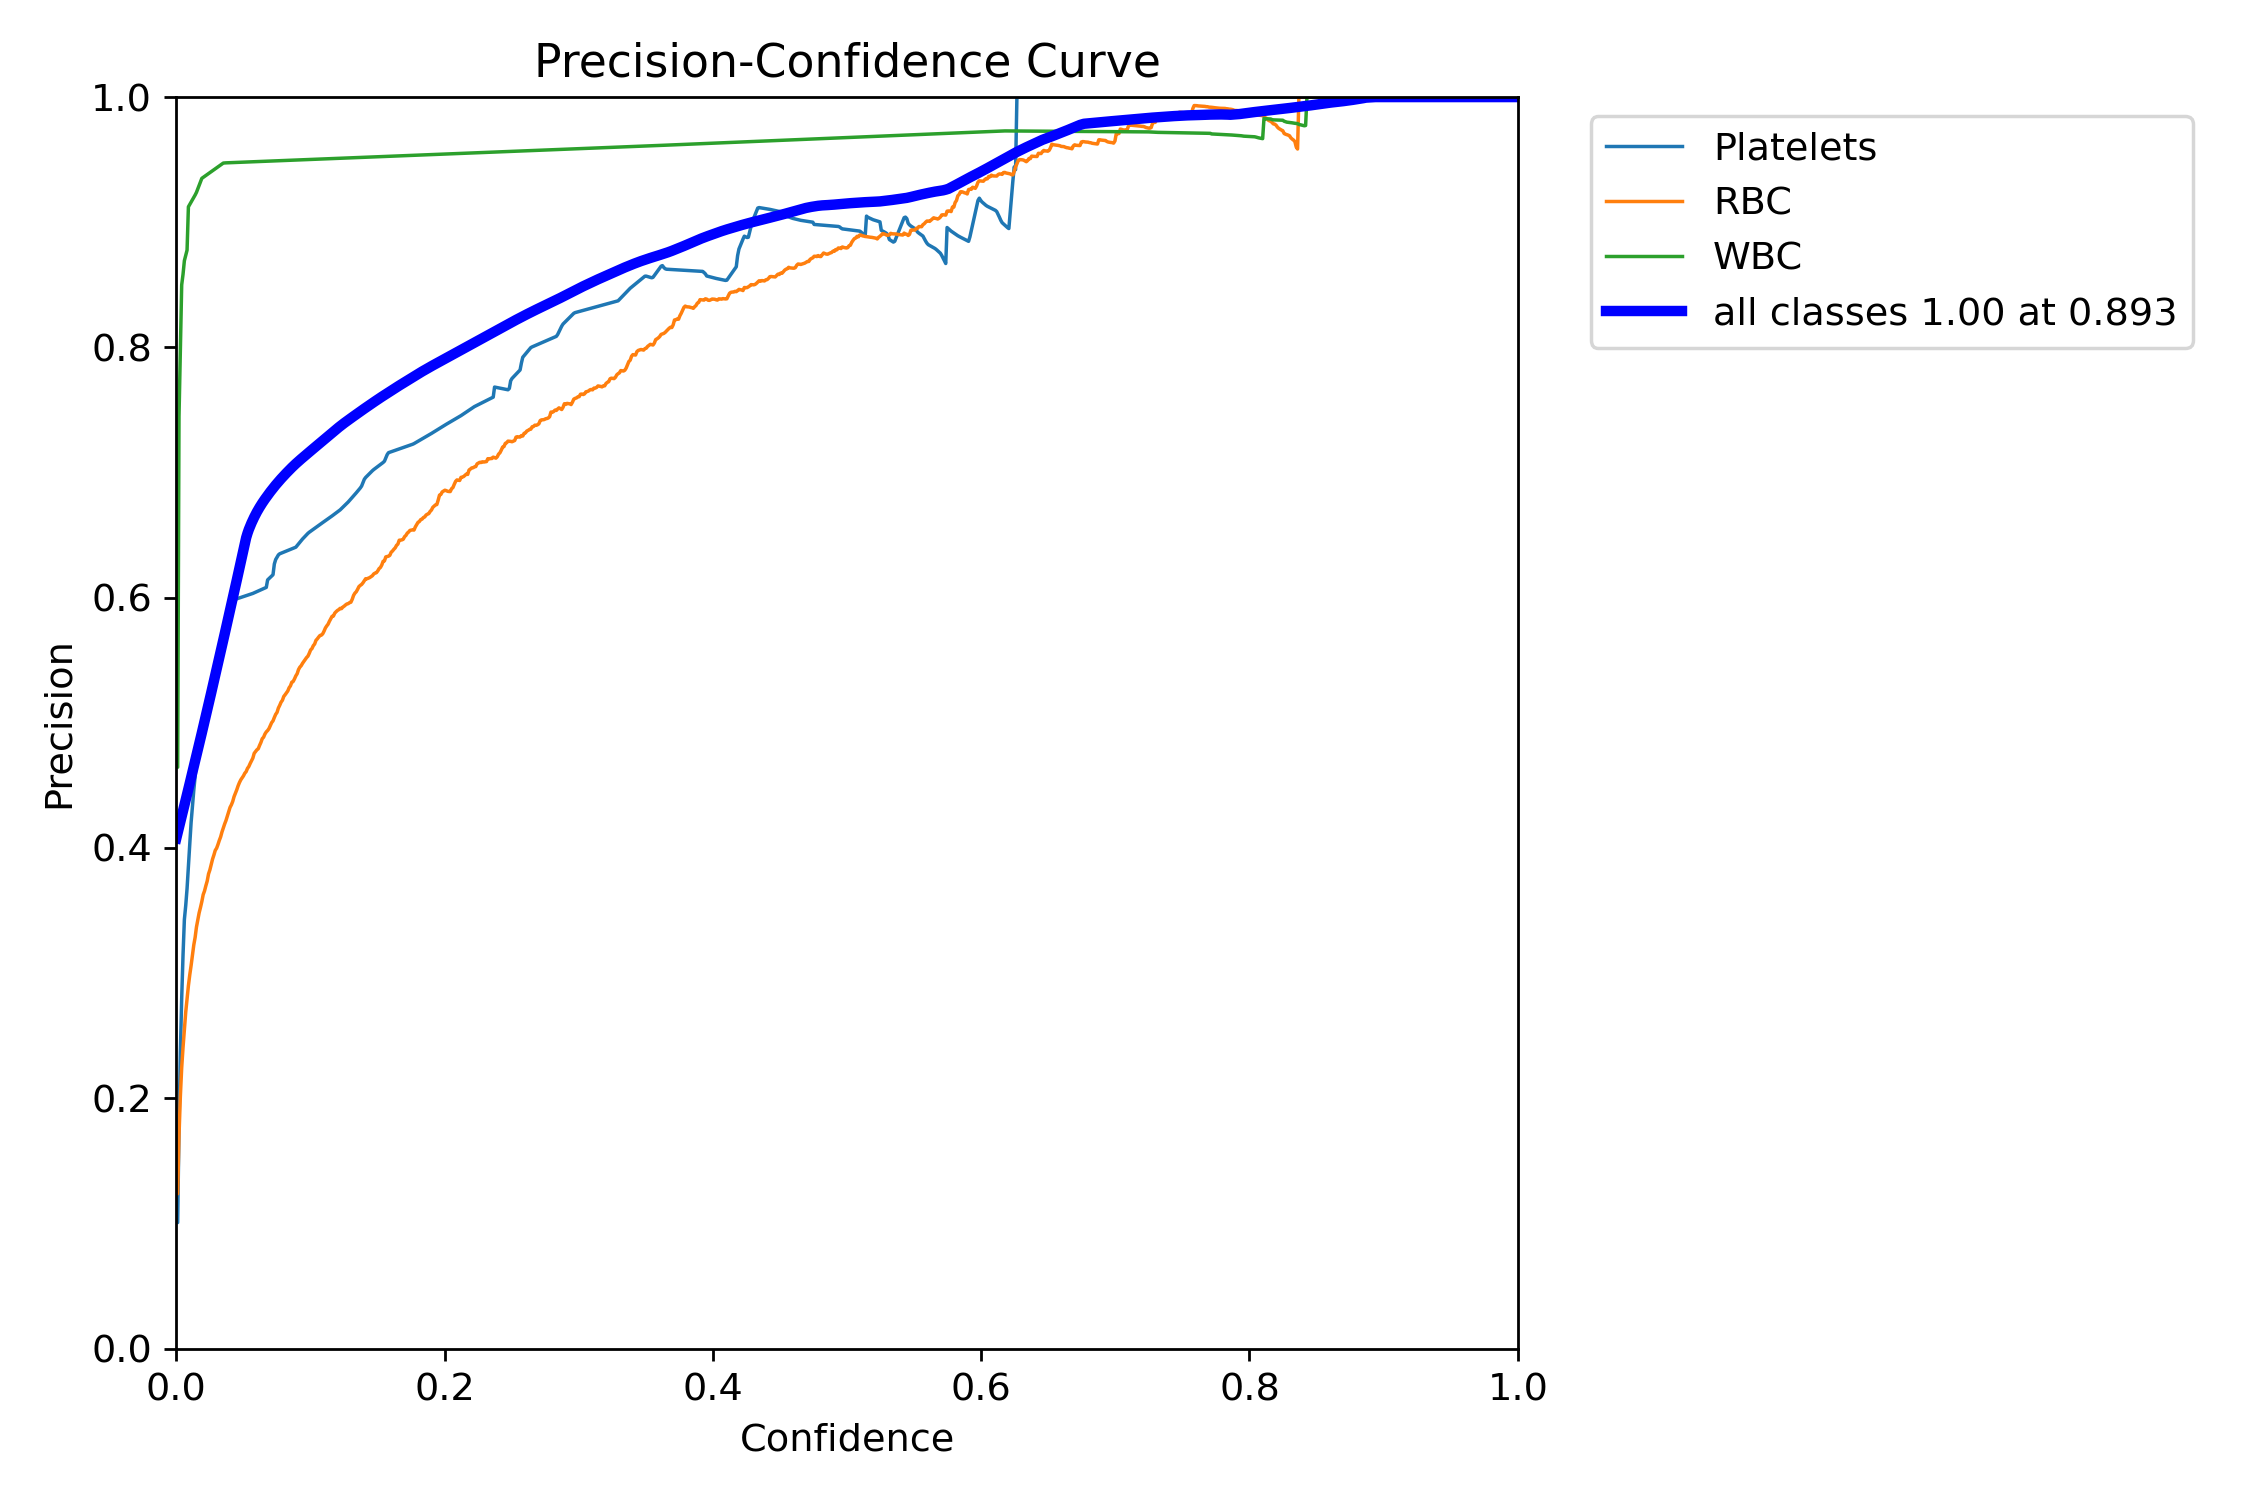

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/P_curve.png', width=600)

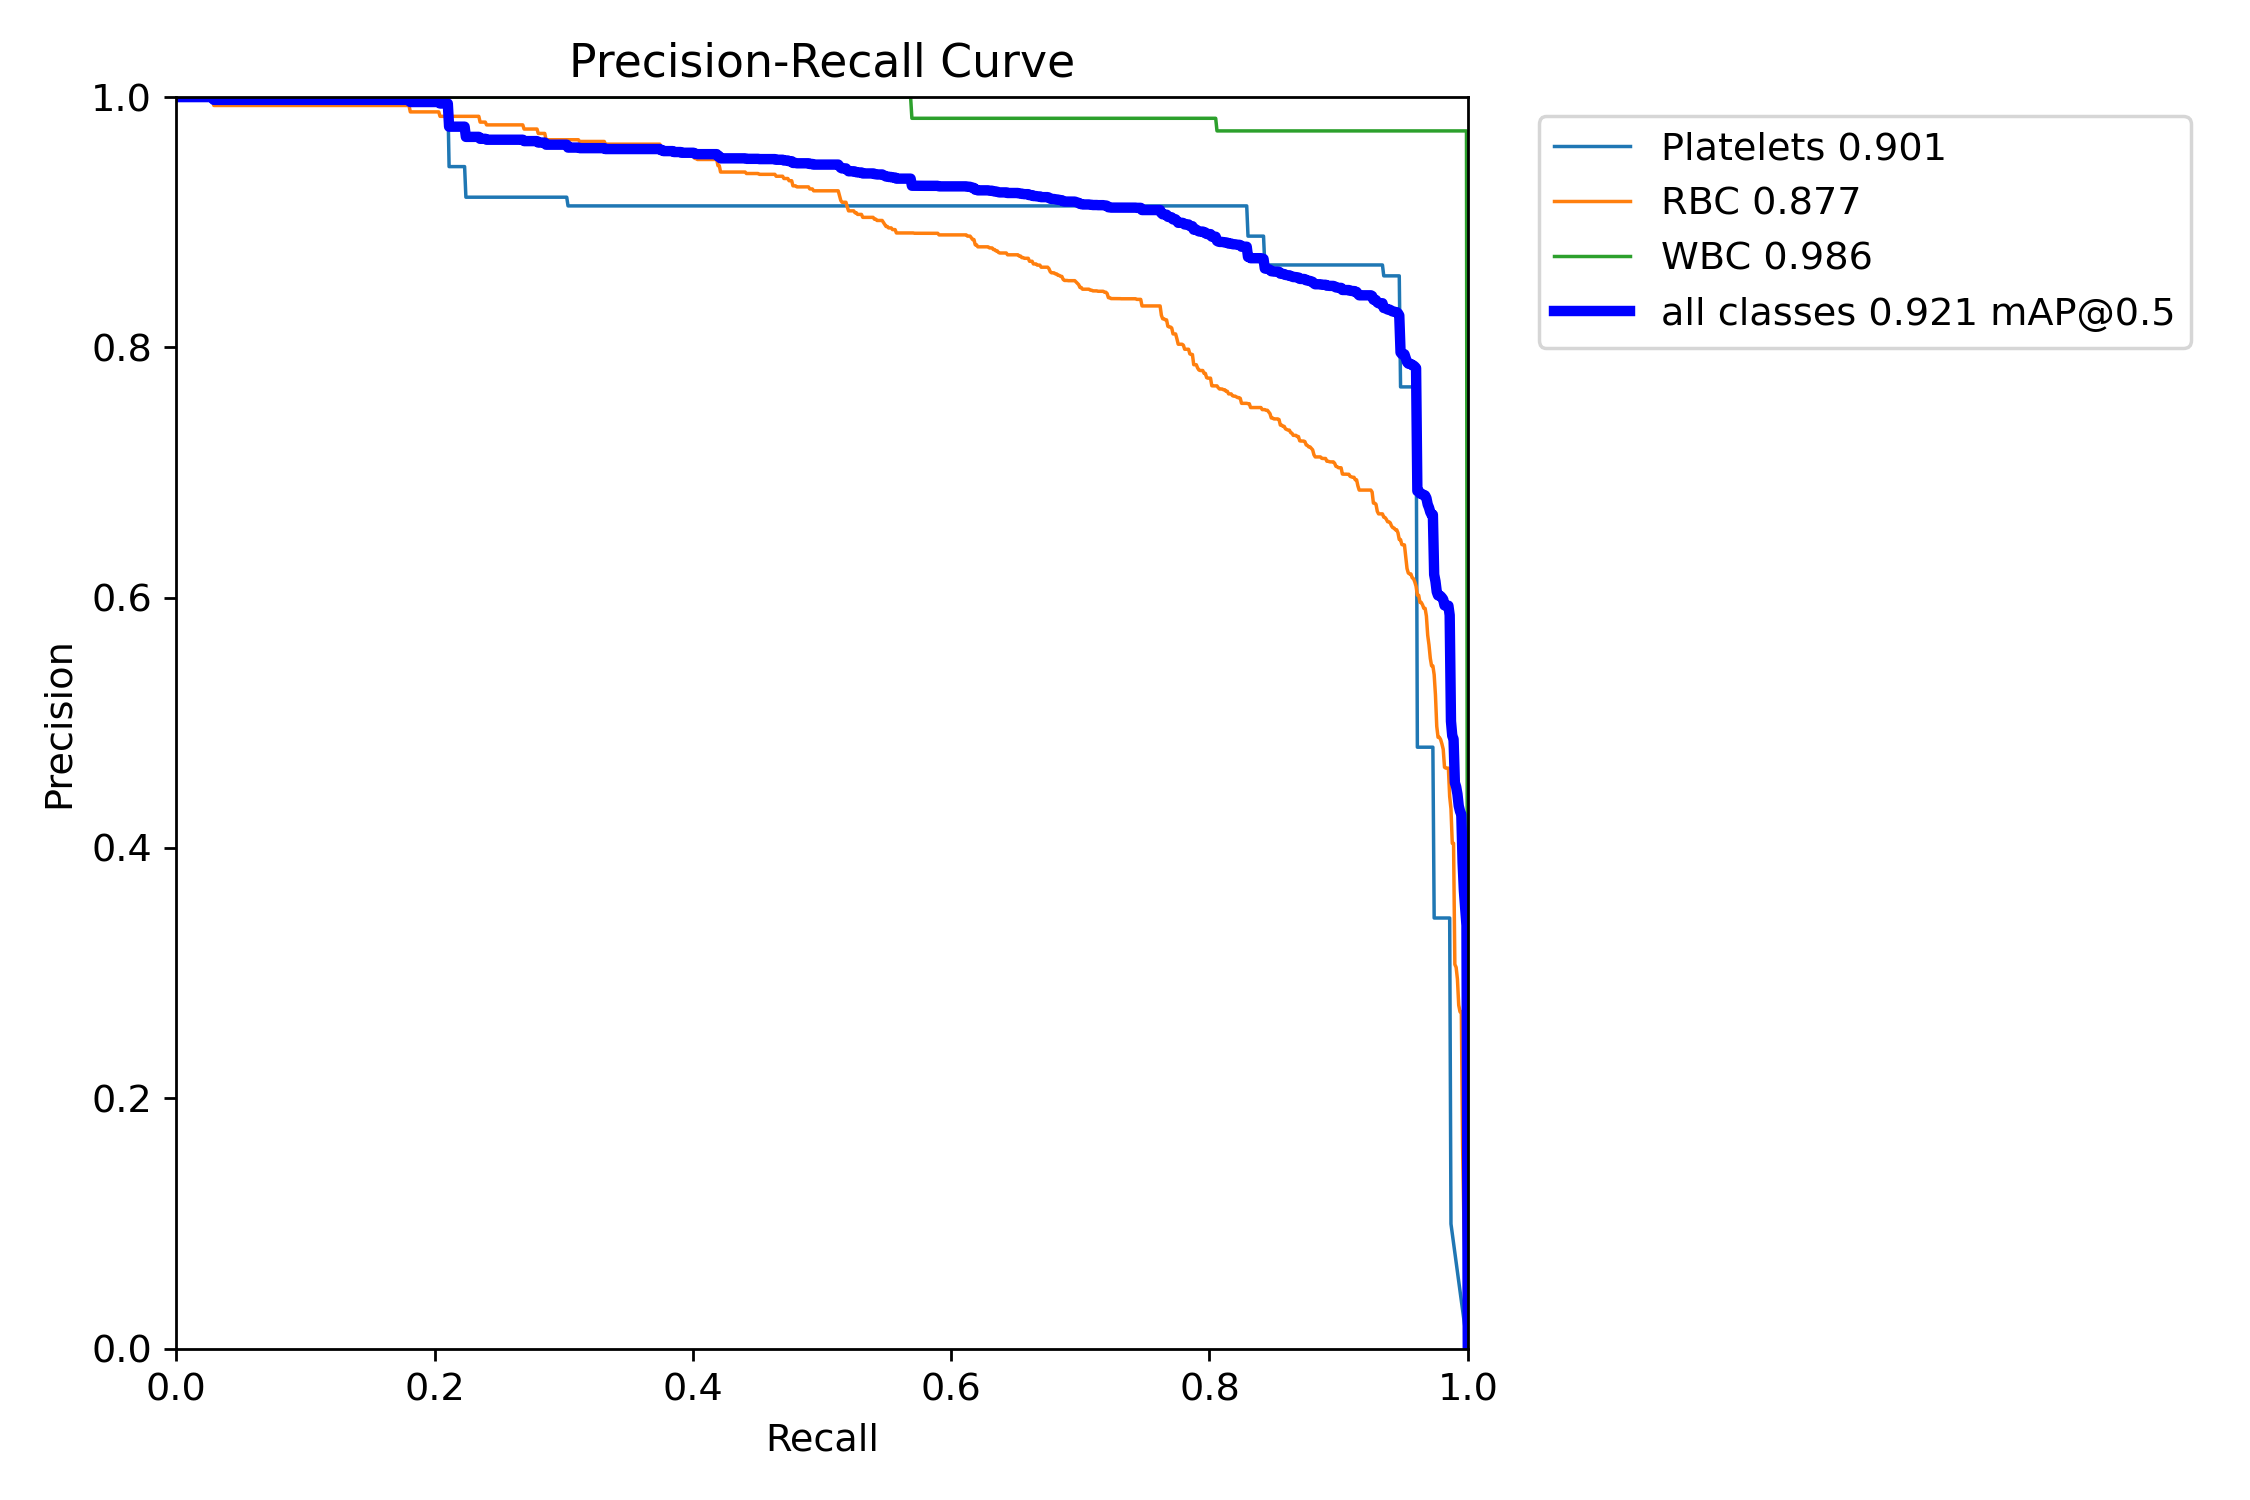

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/PR_curve.png', width=600)

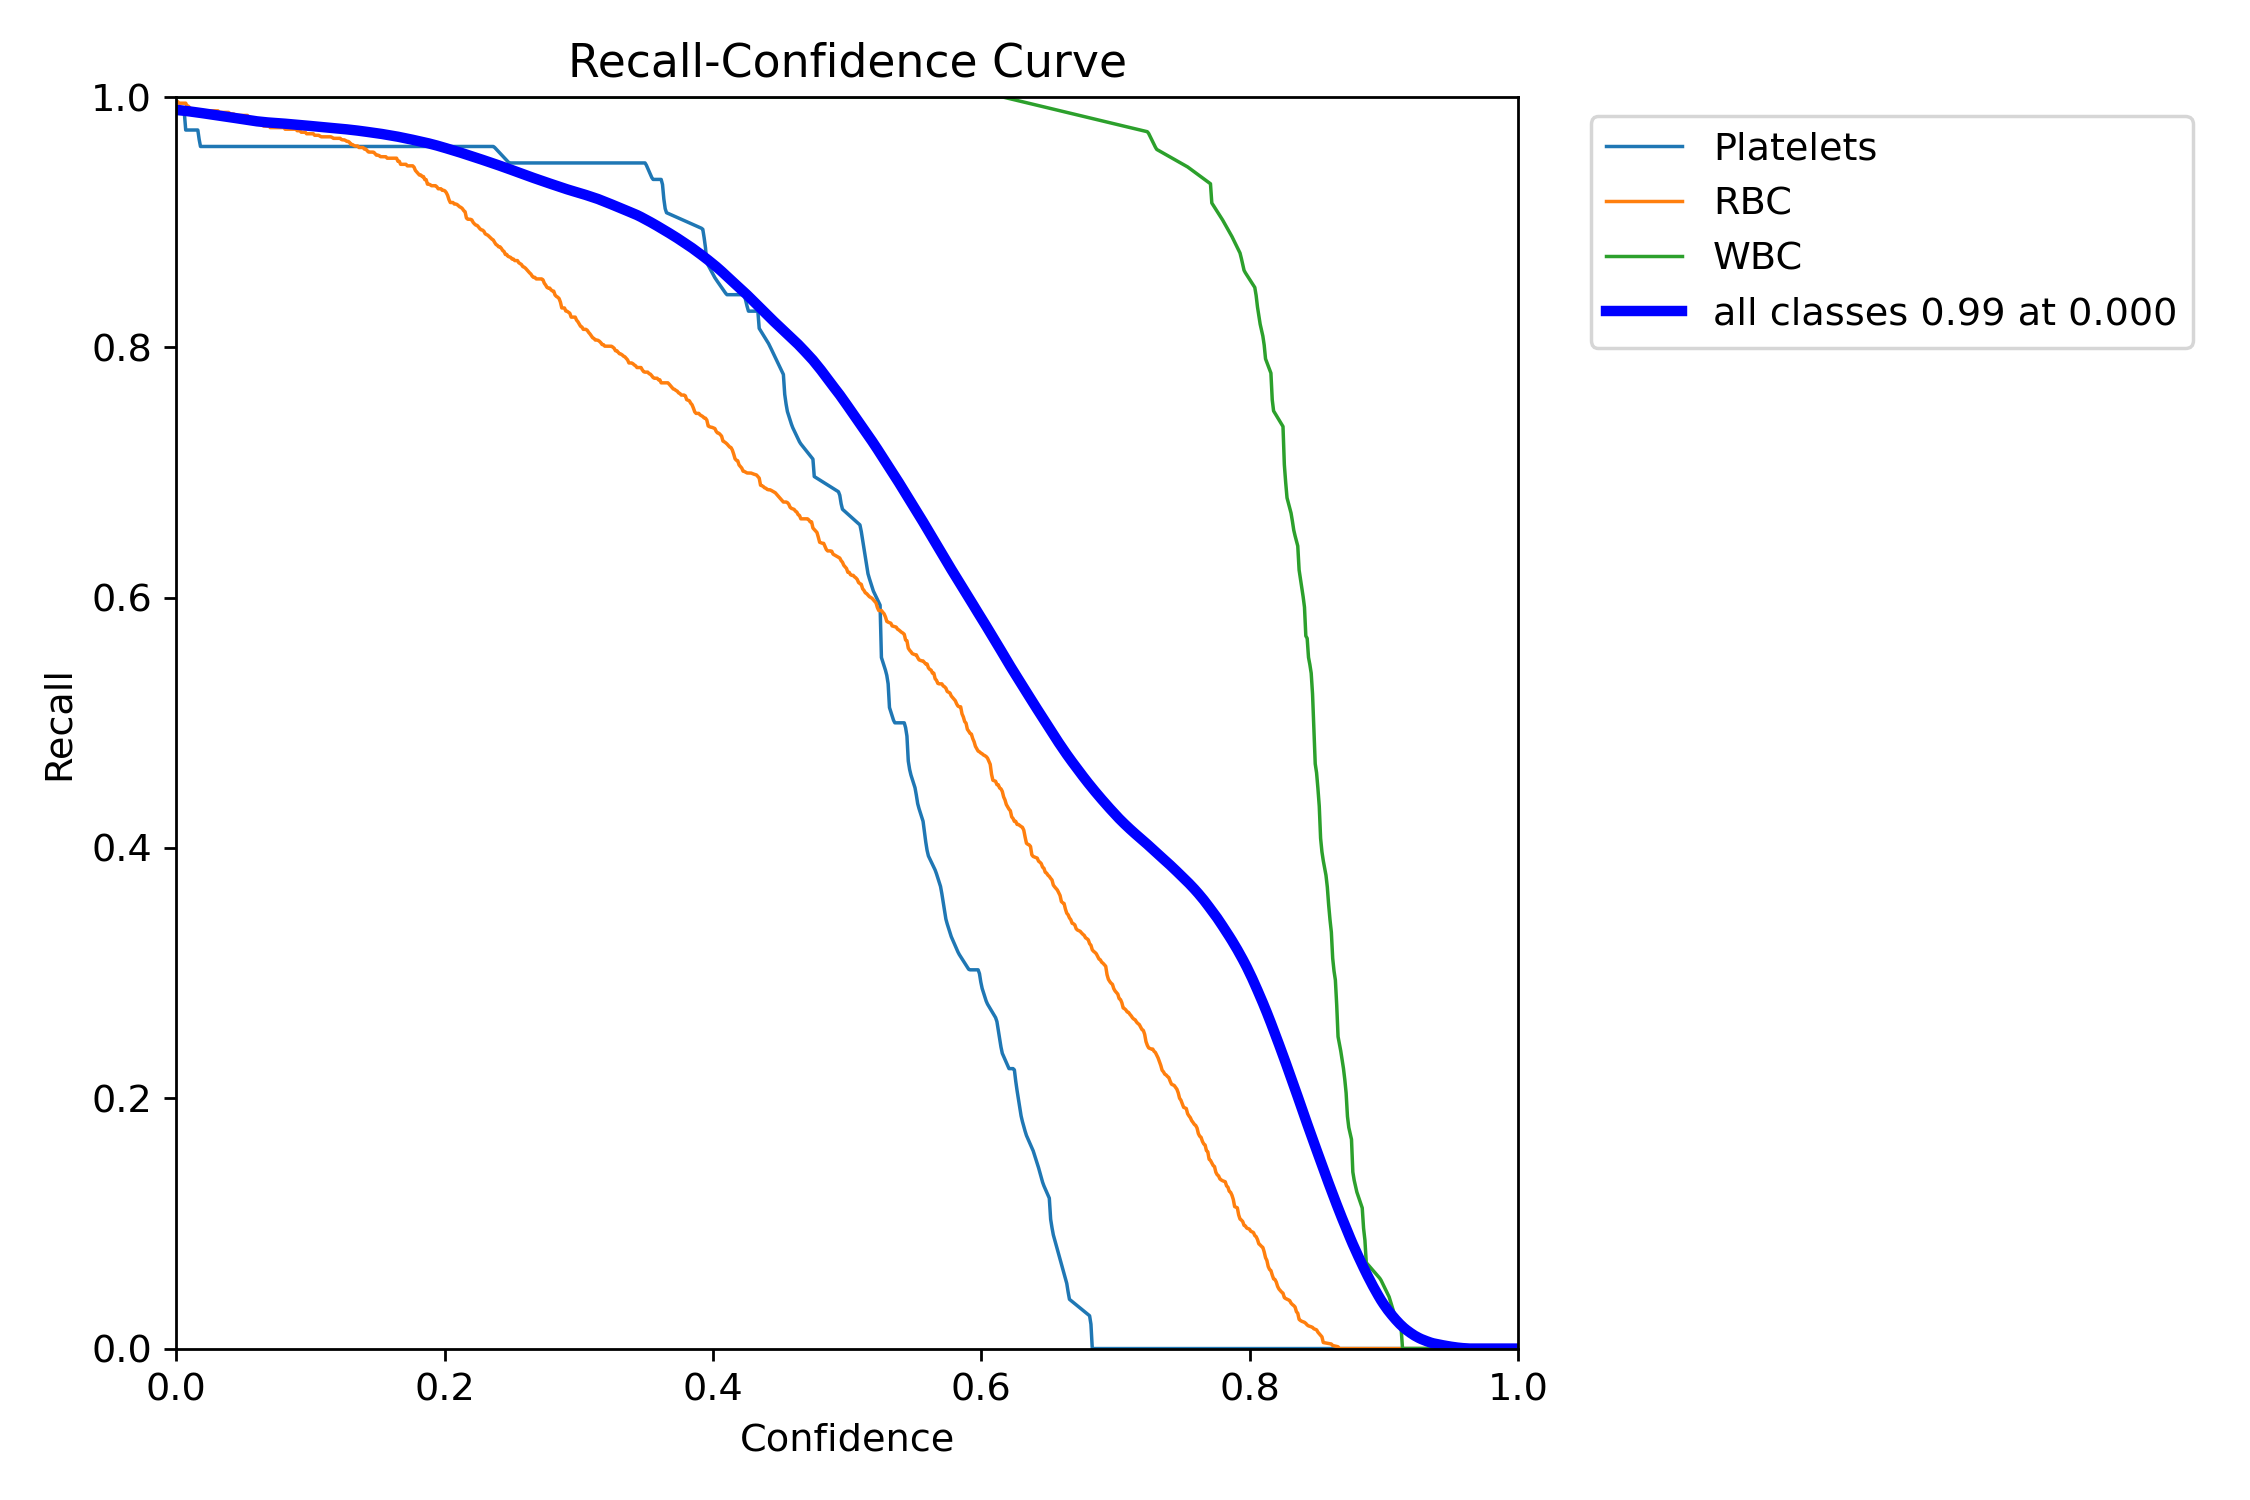

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/R_curve.png', width=600)

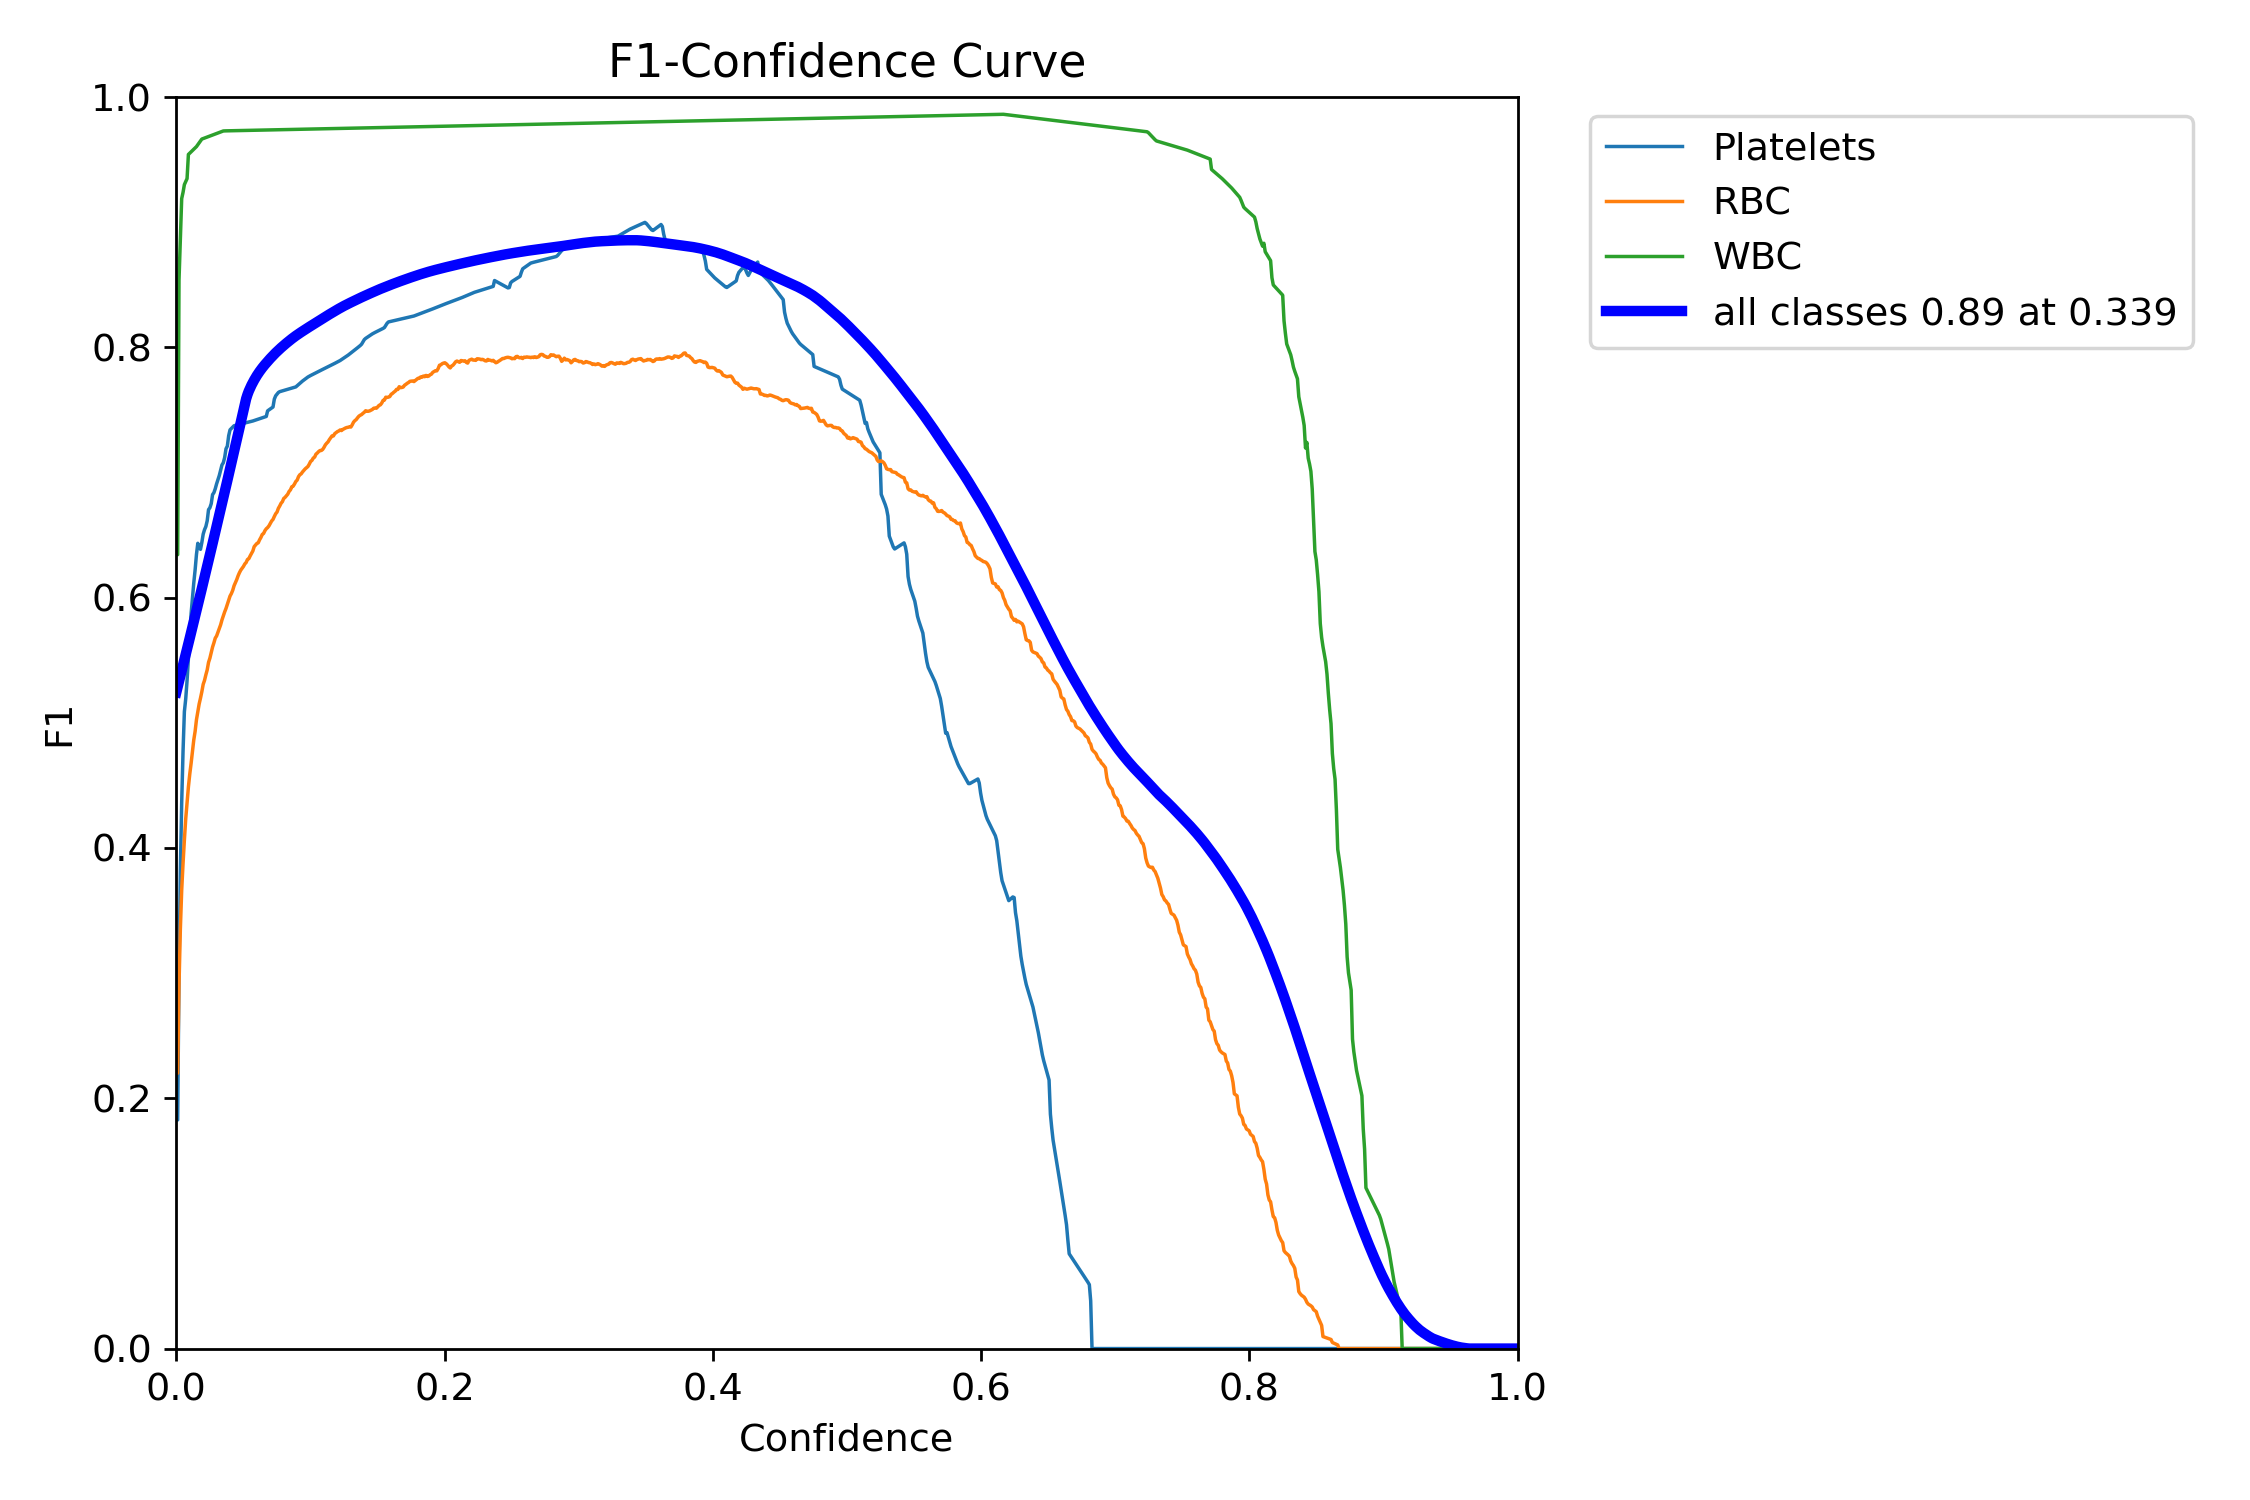

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/F1_curve.png', width=600)

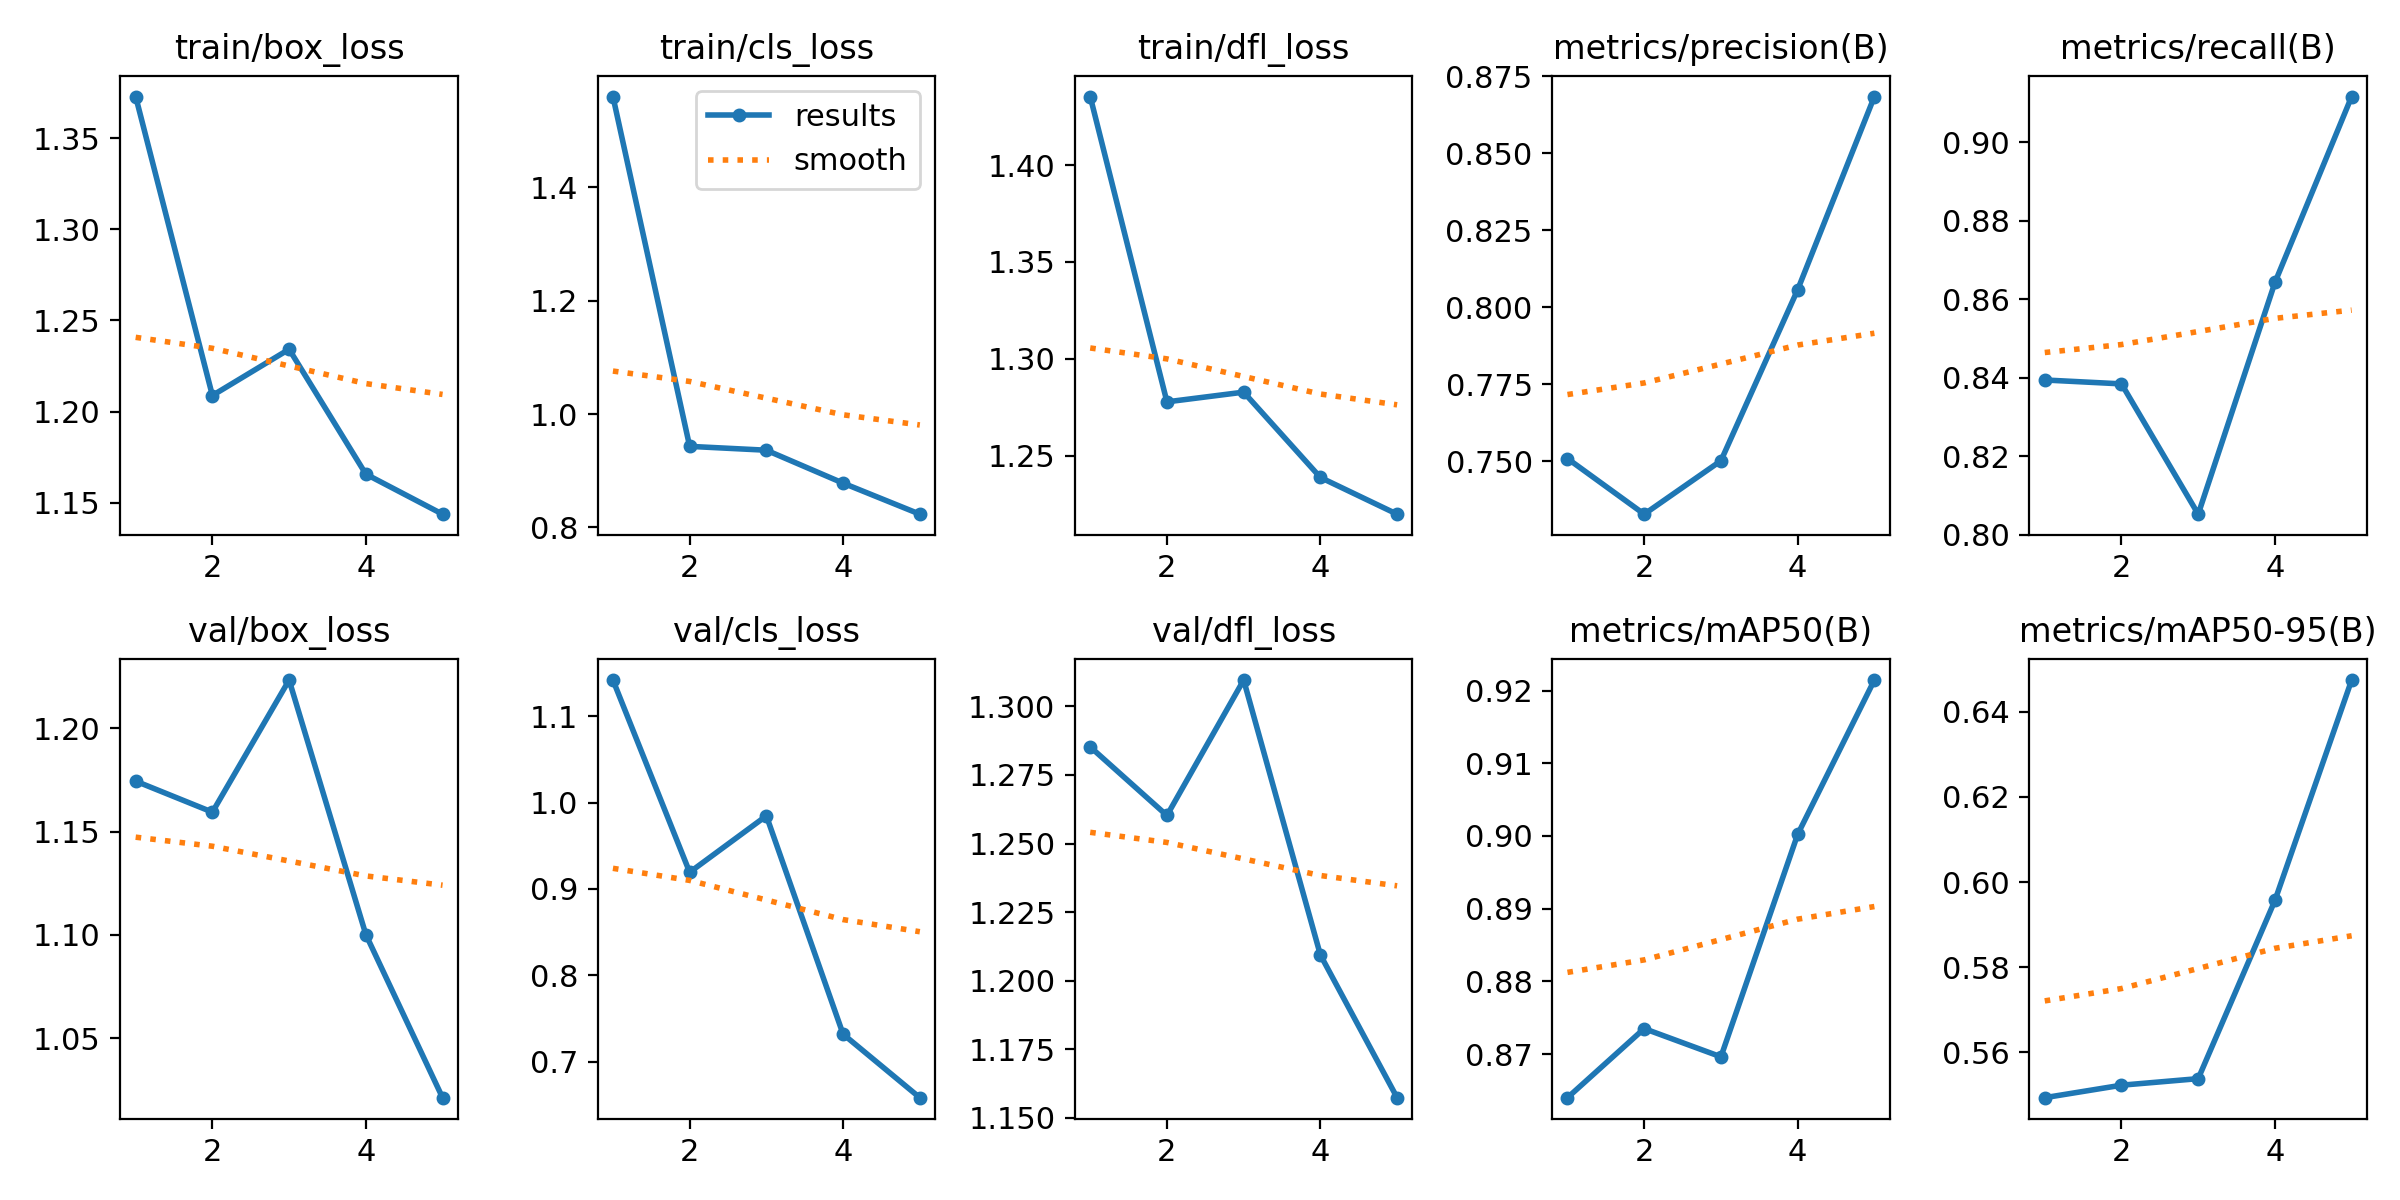

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

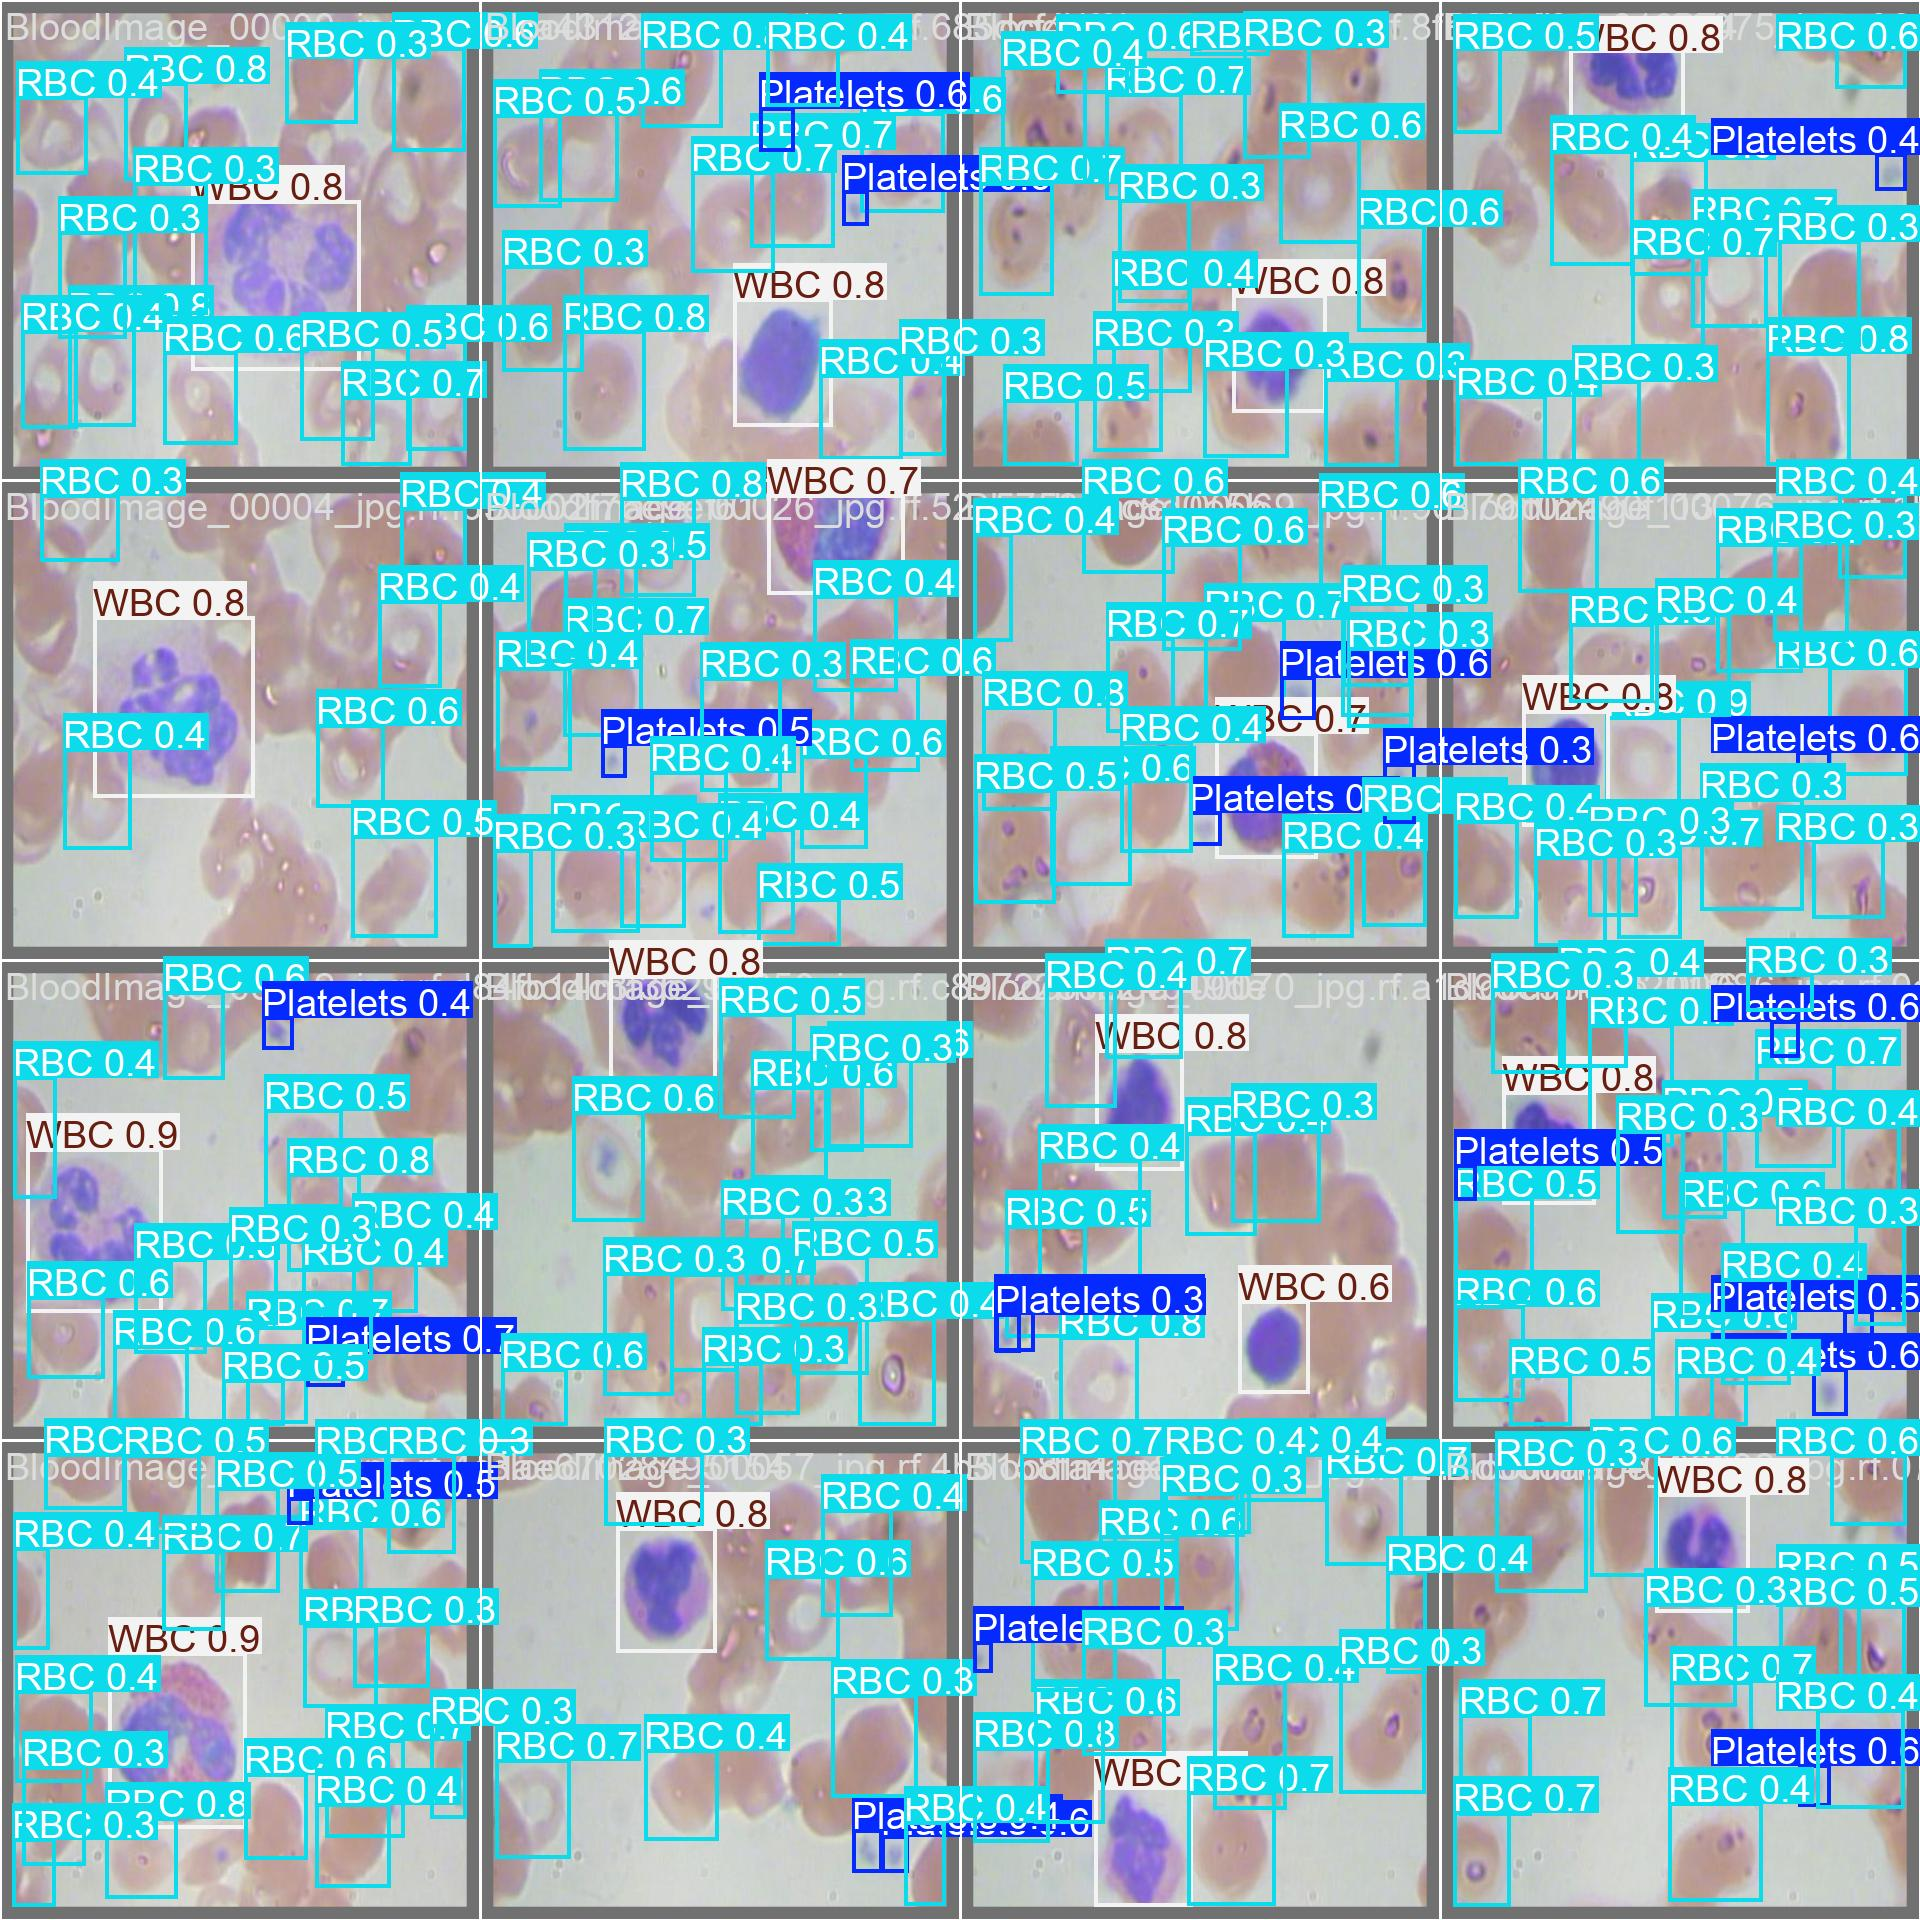

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)


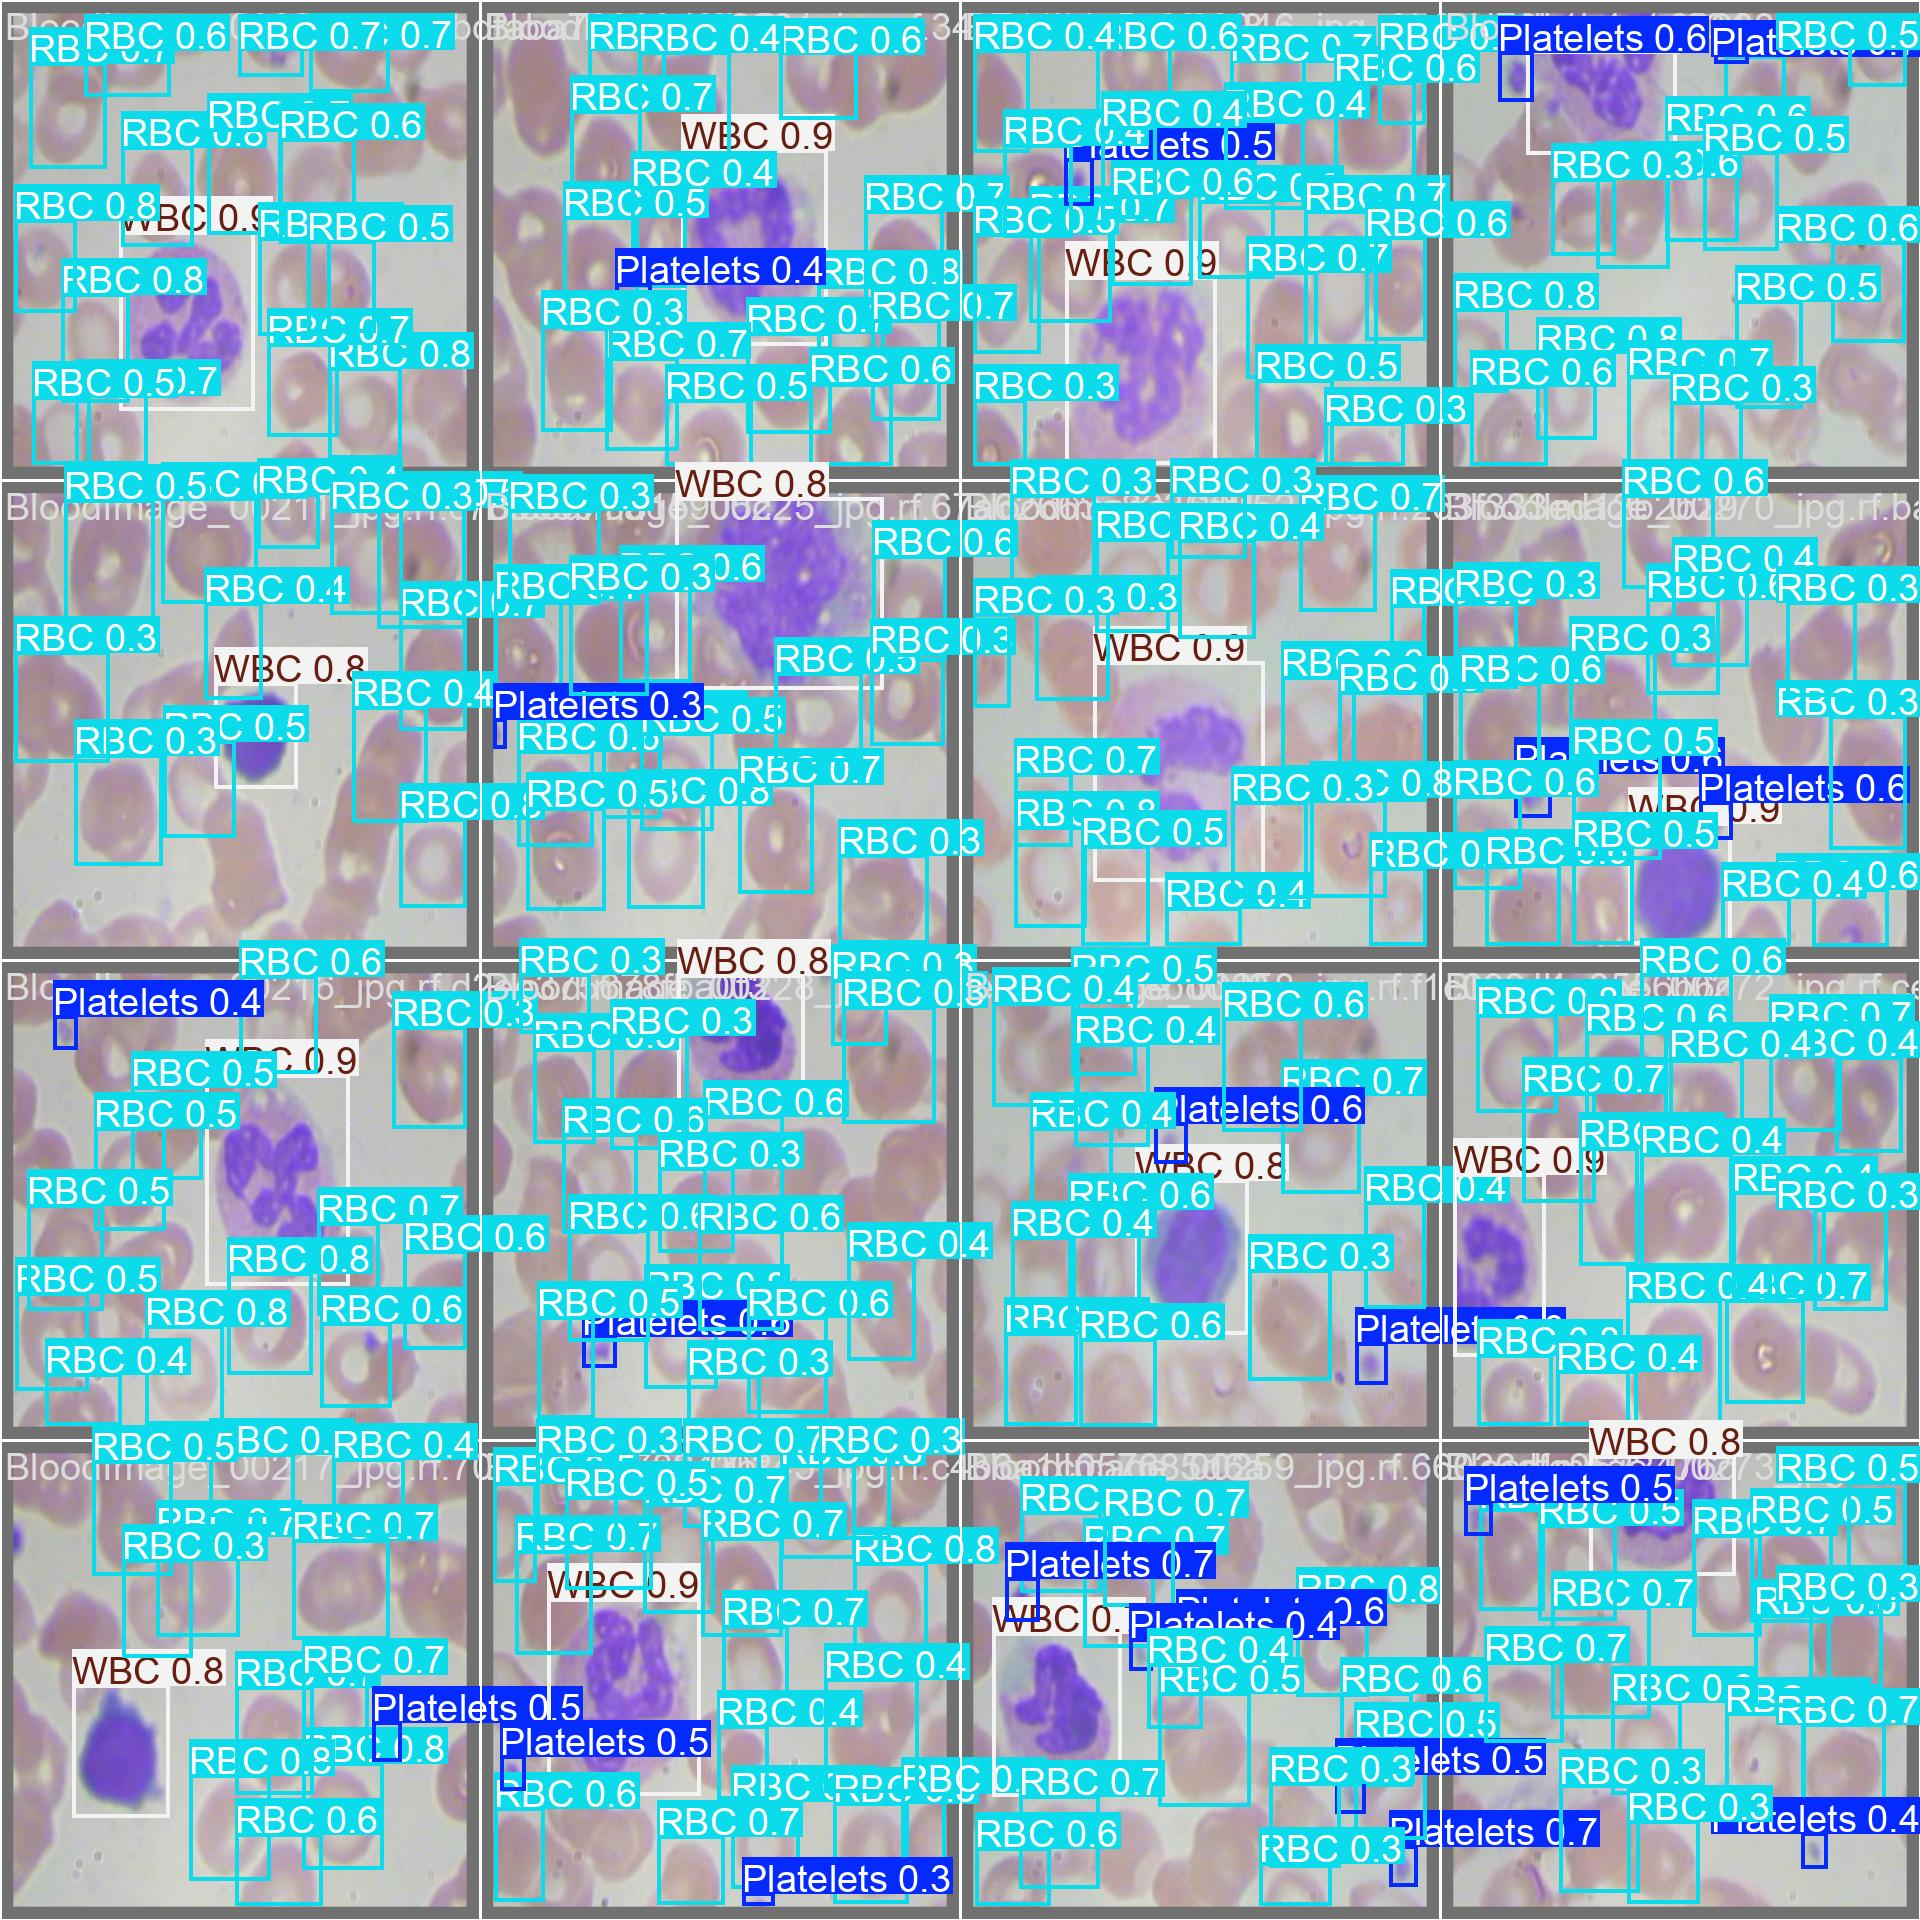

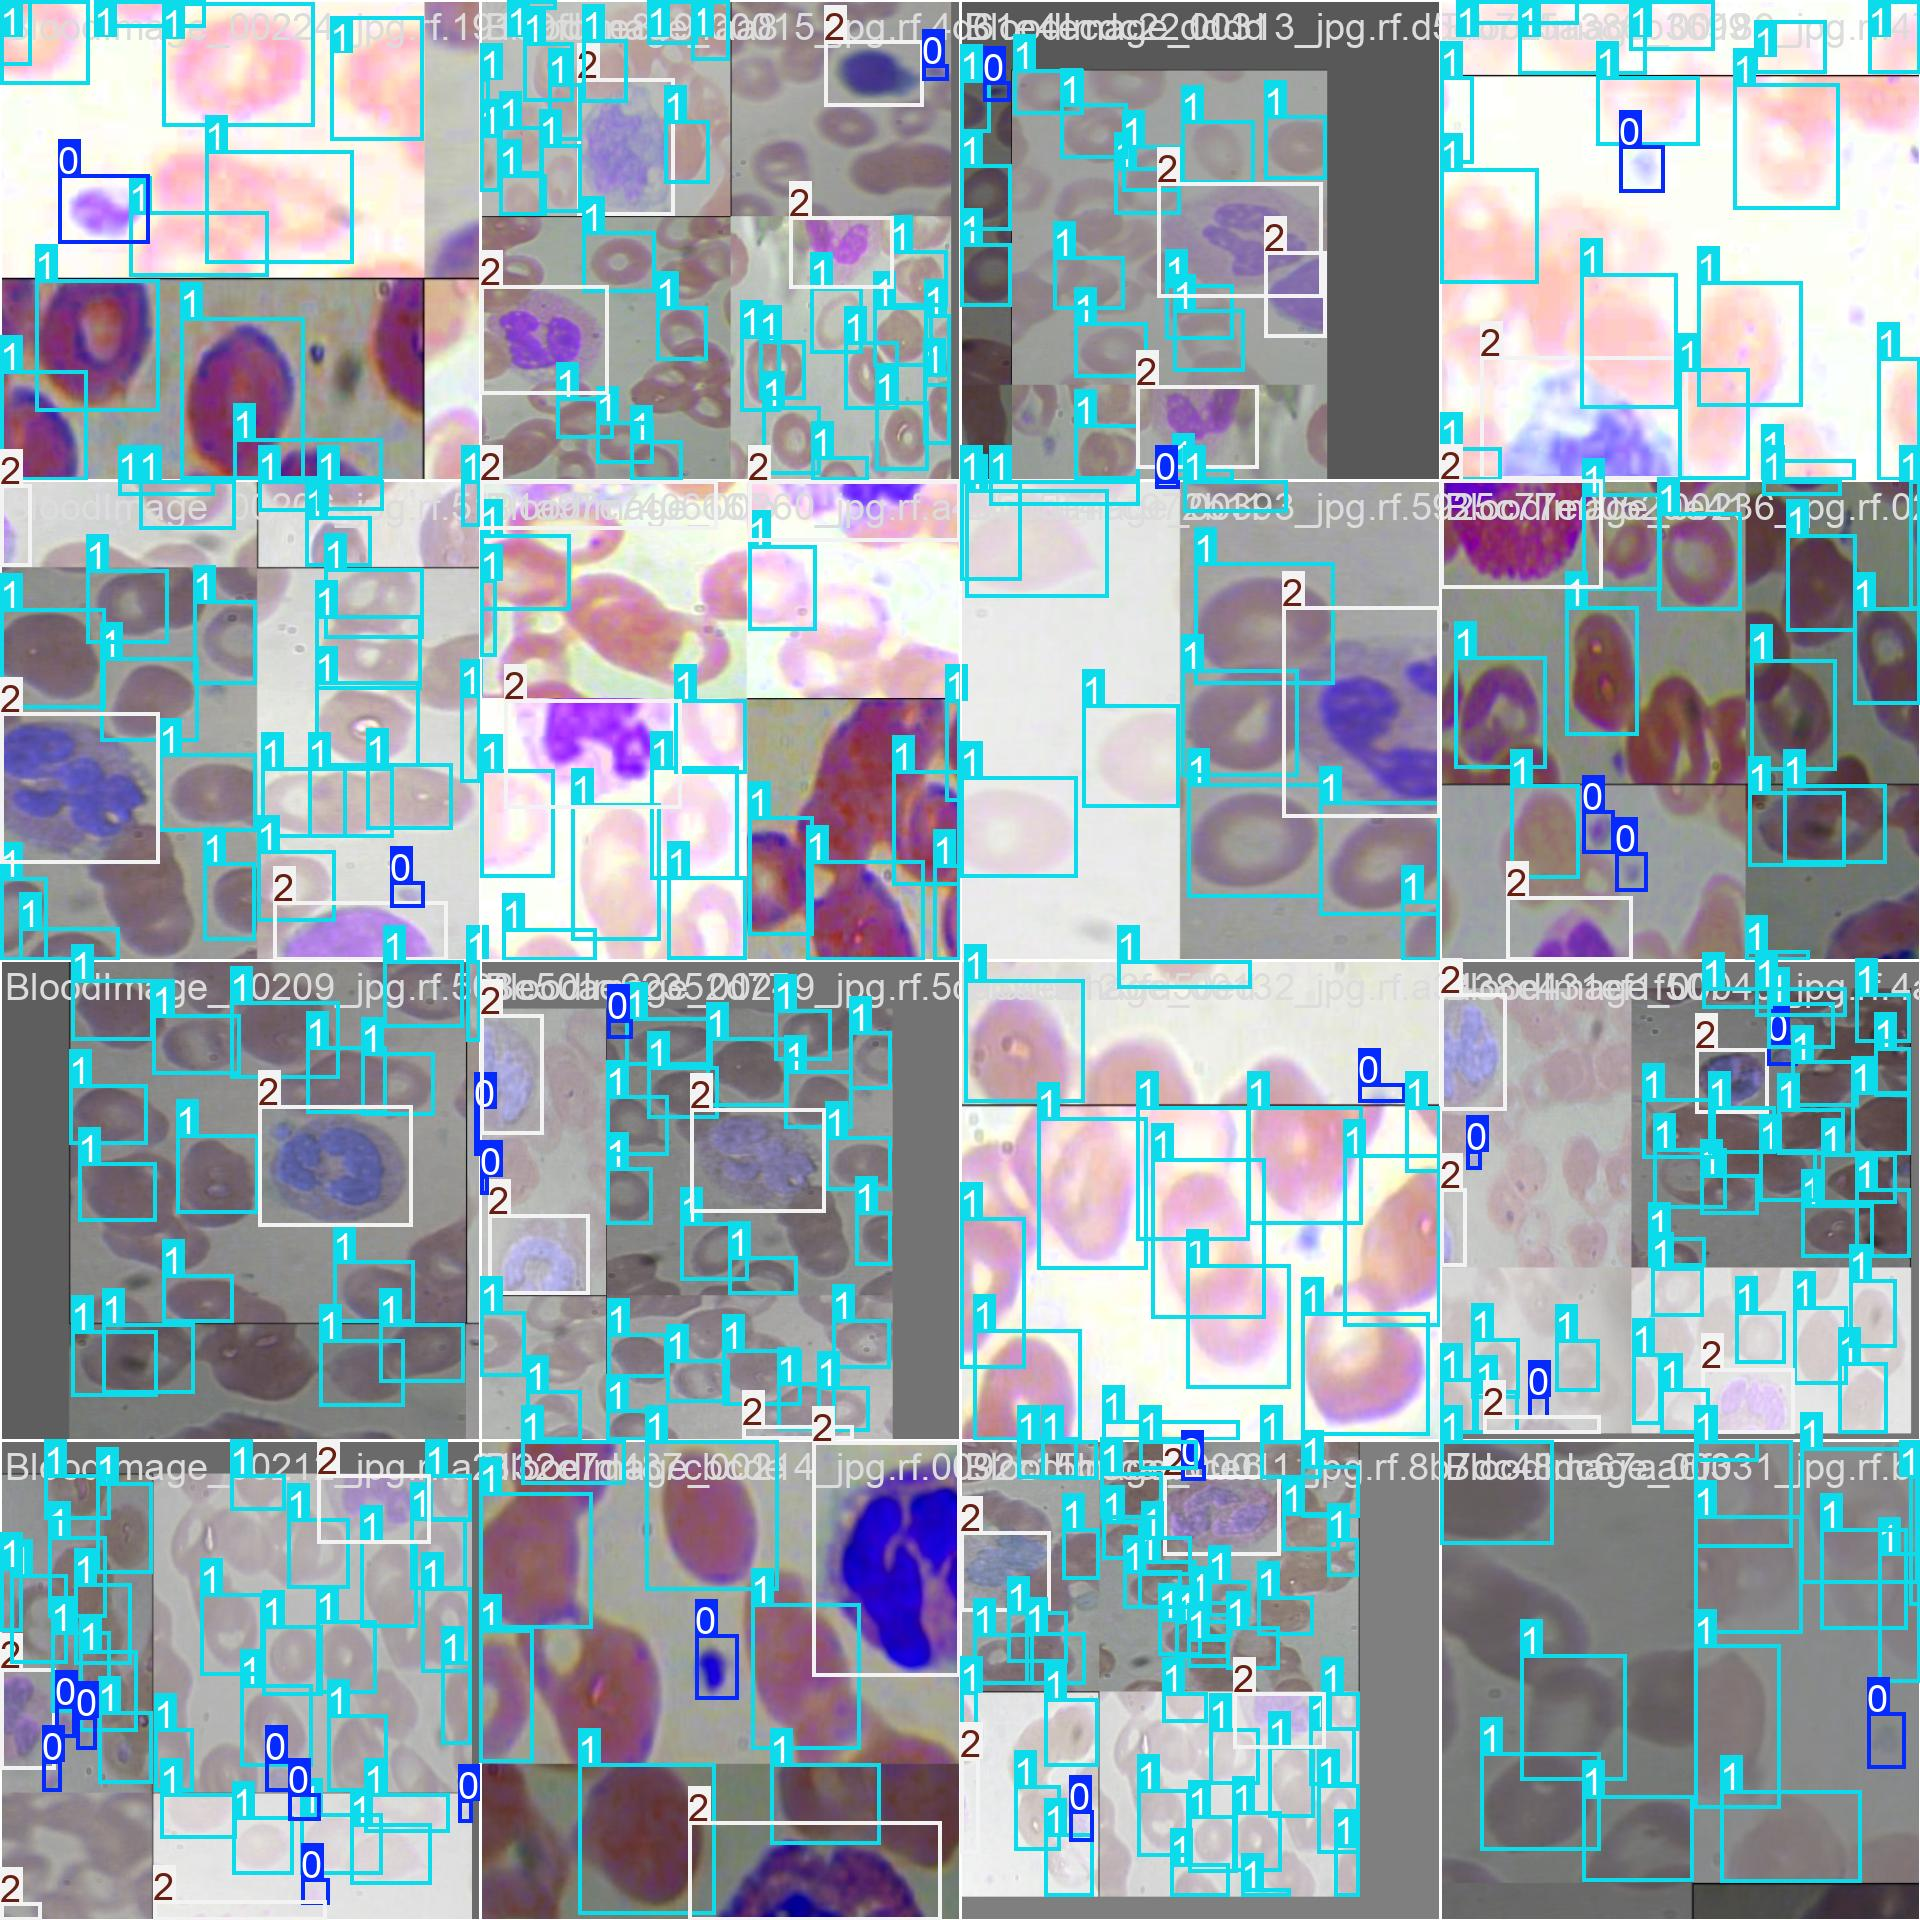

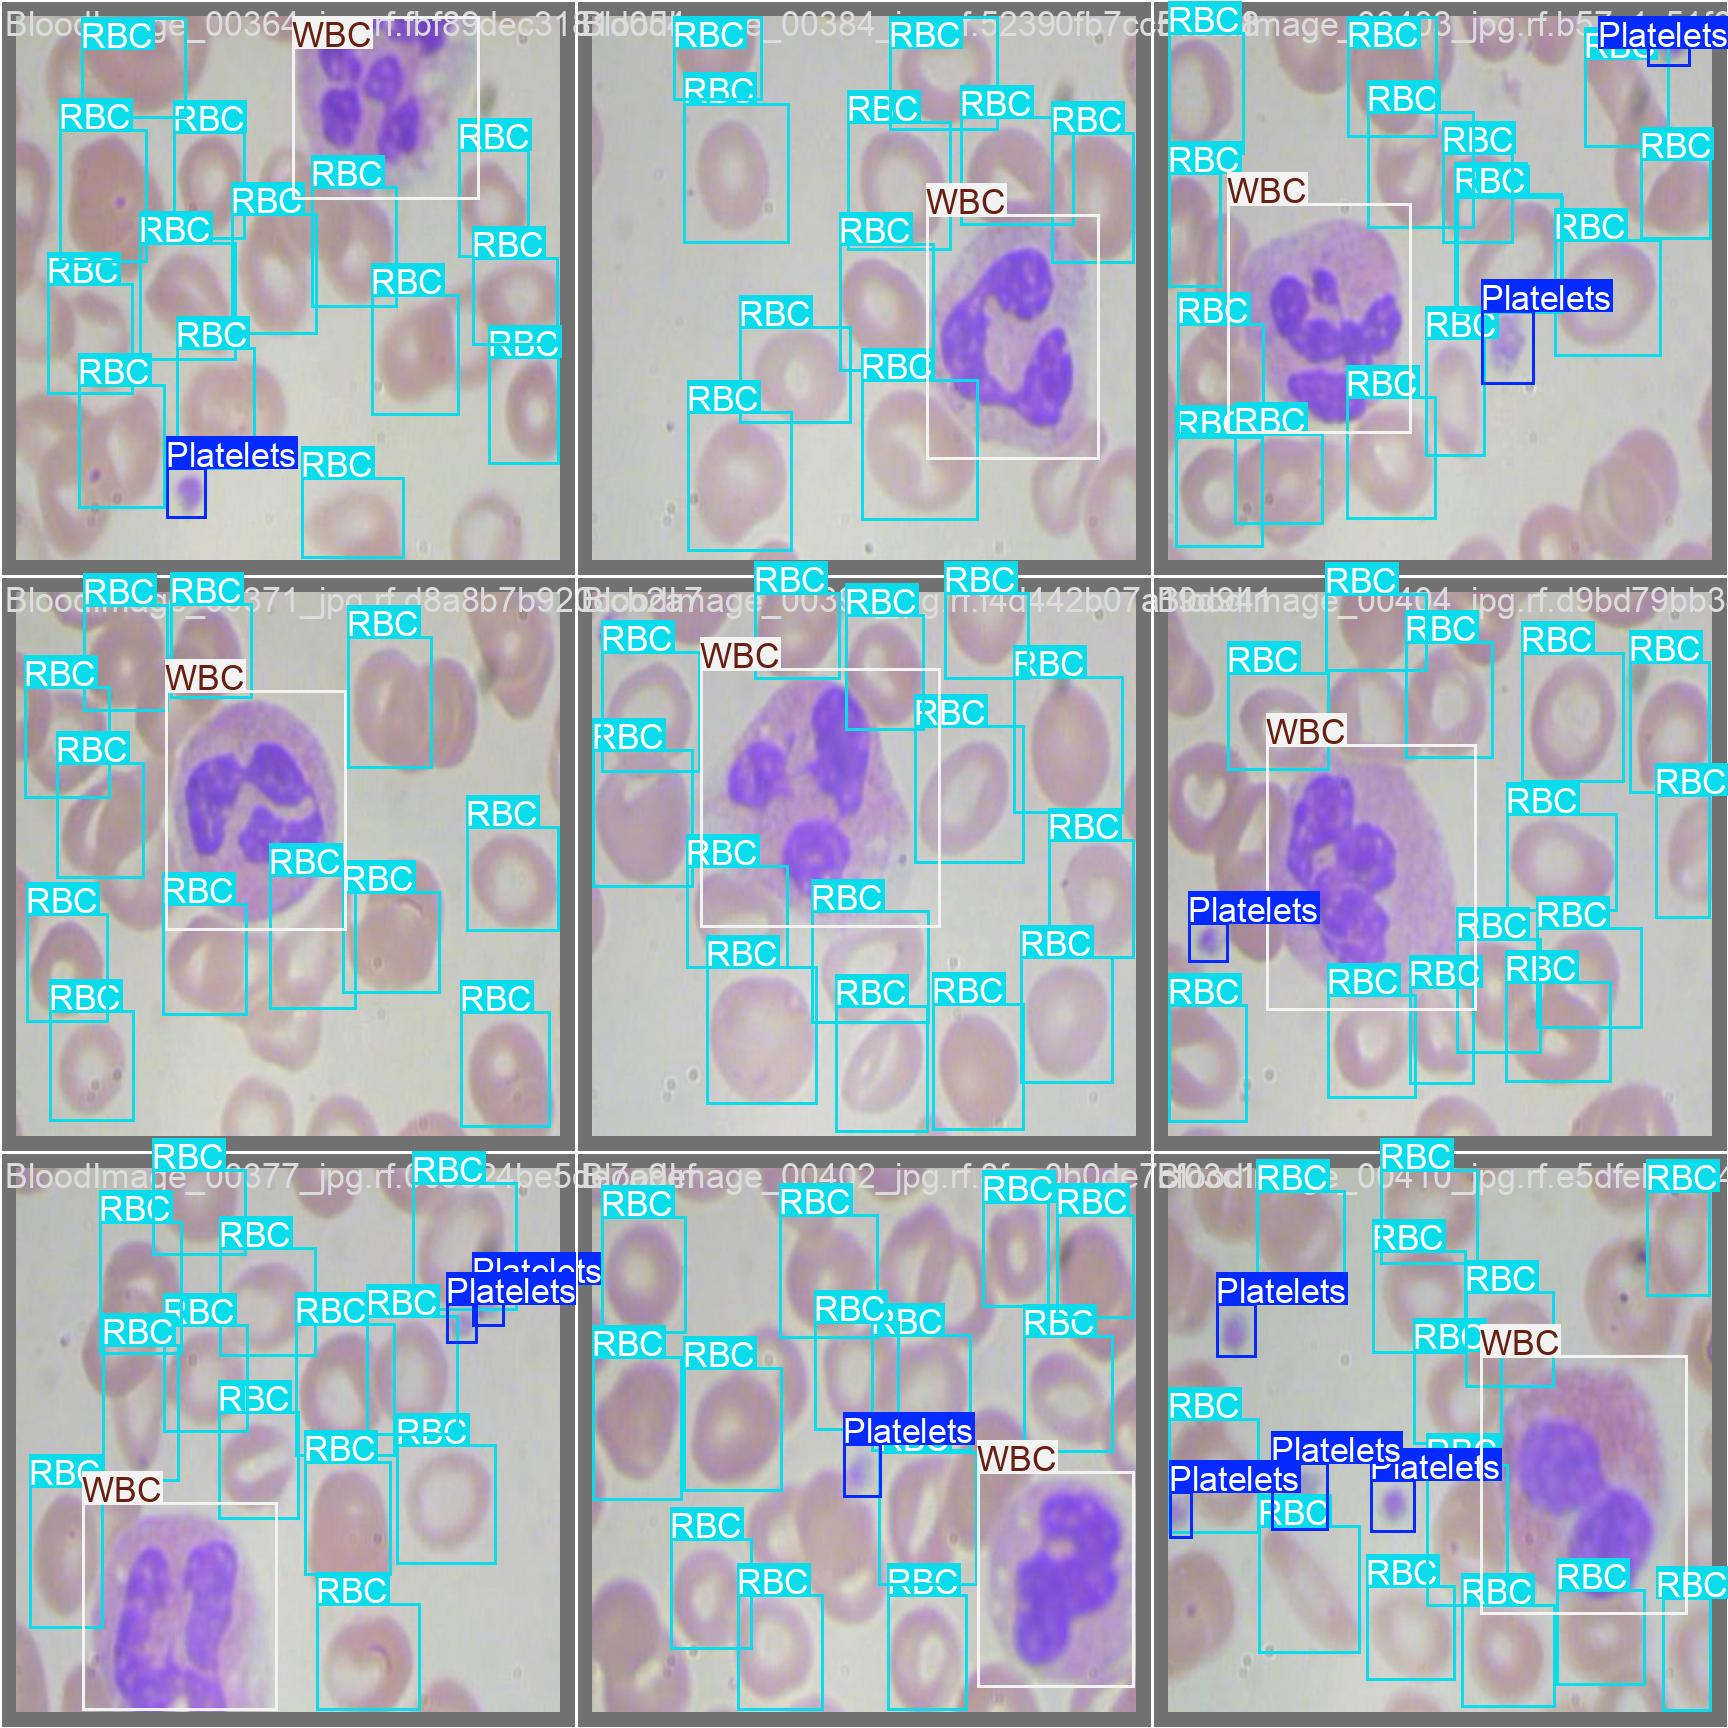

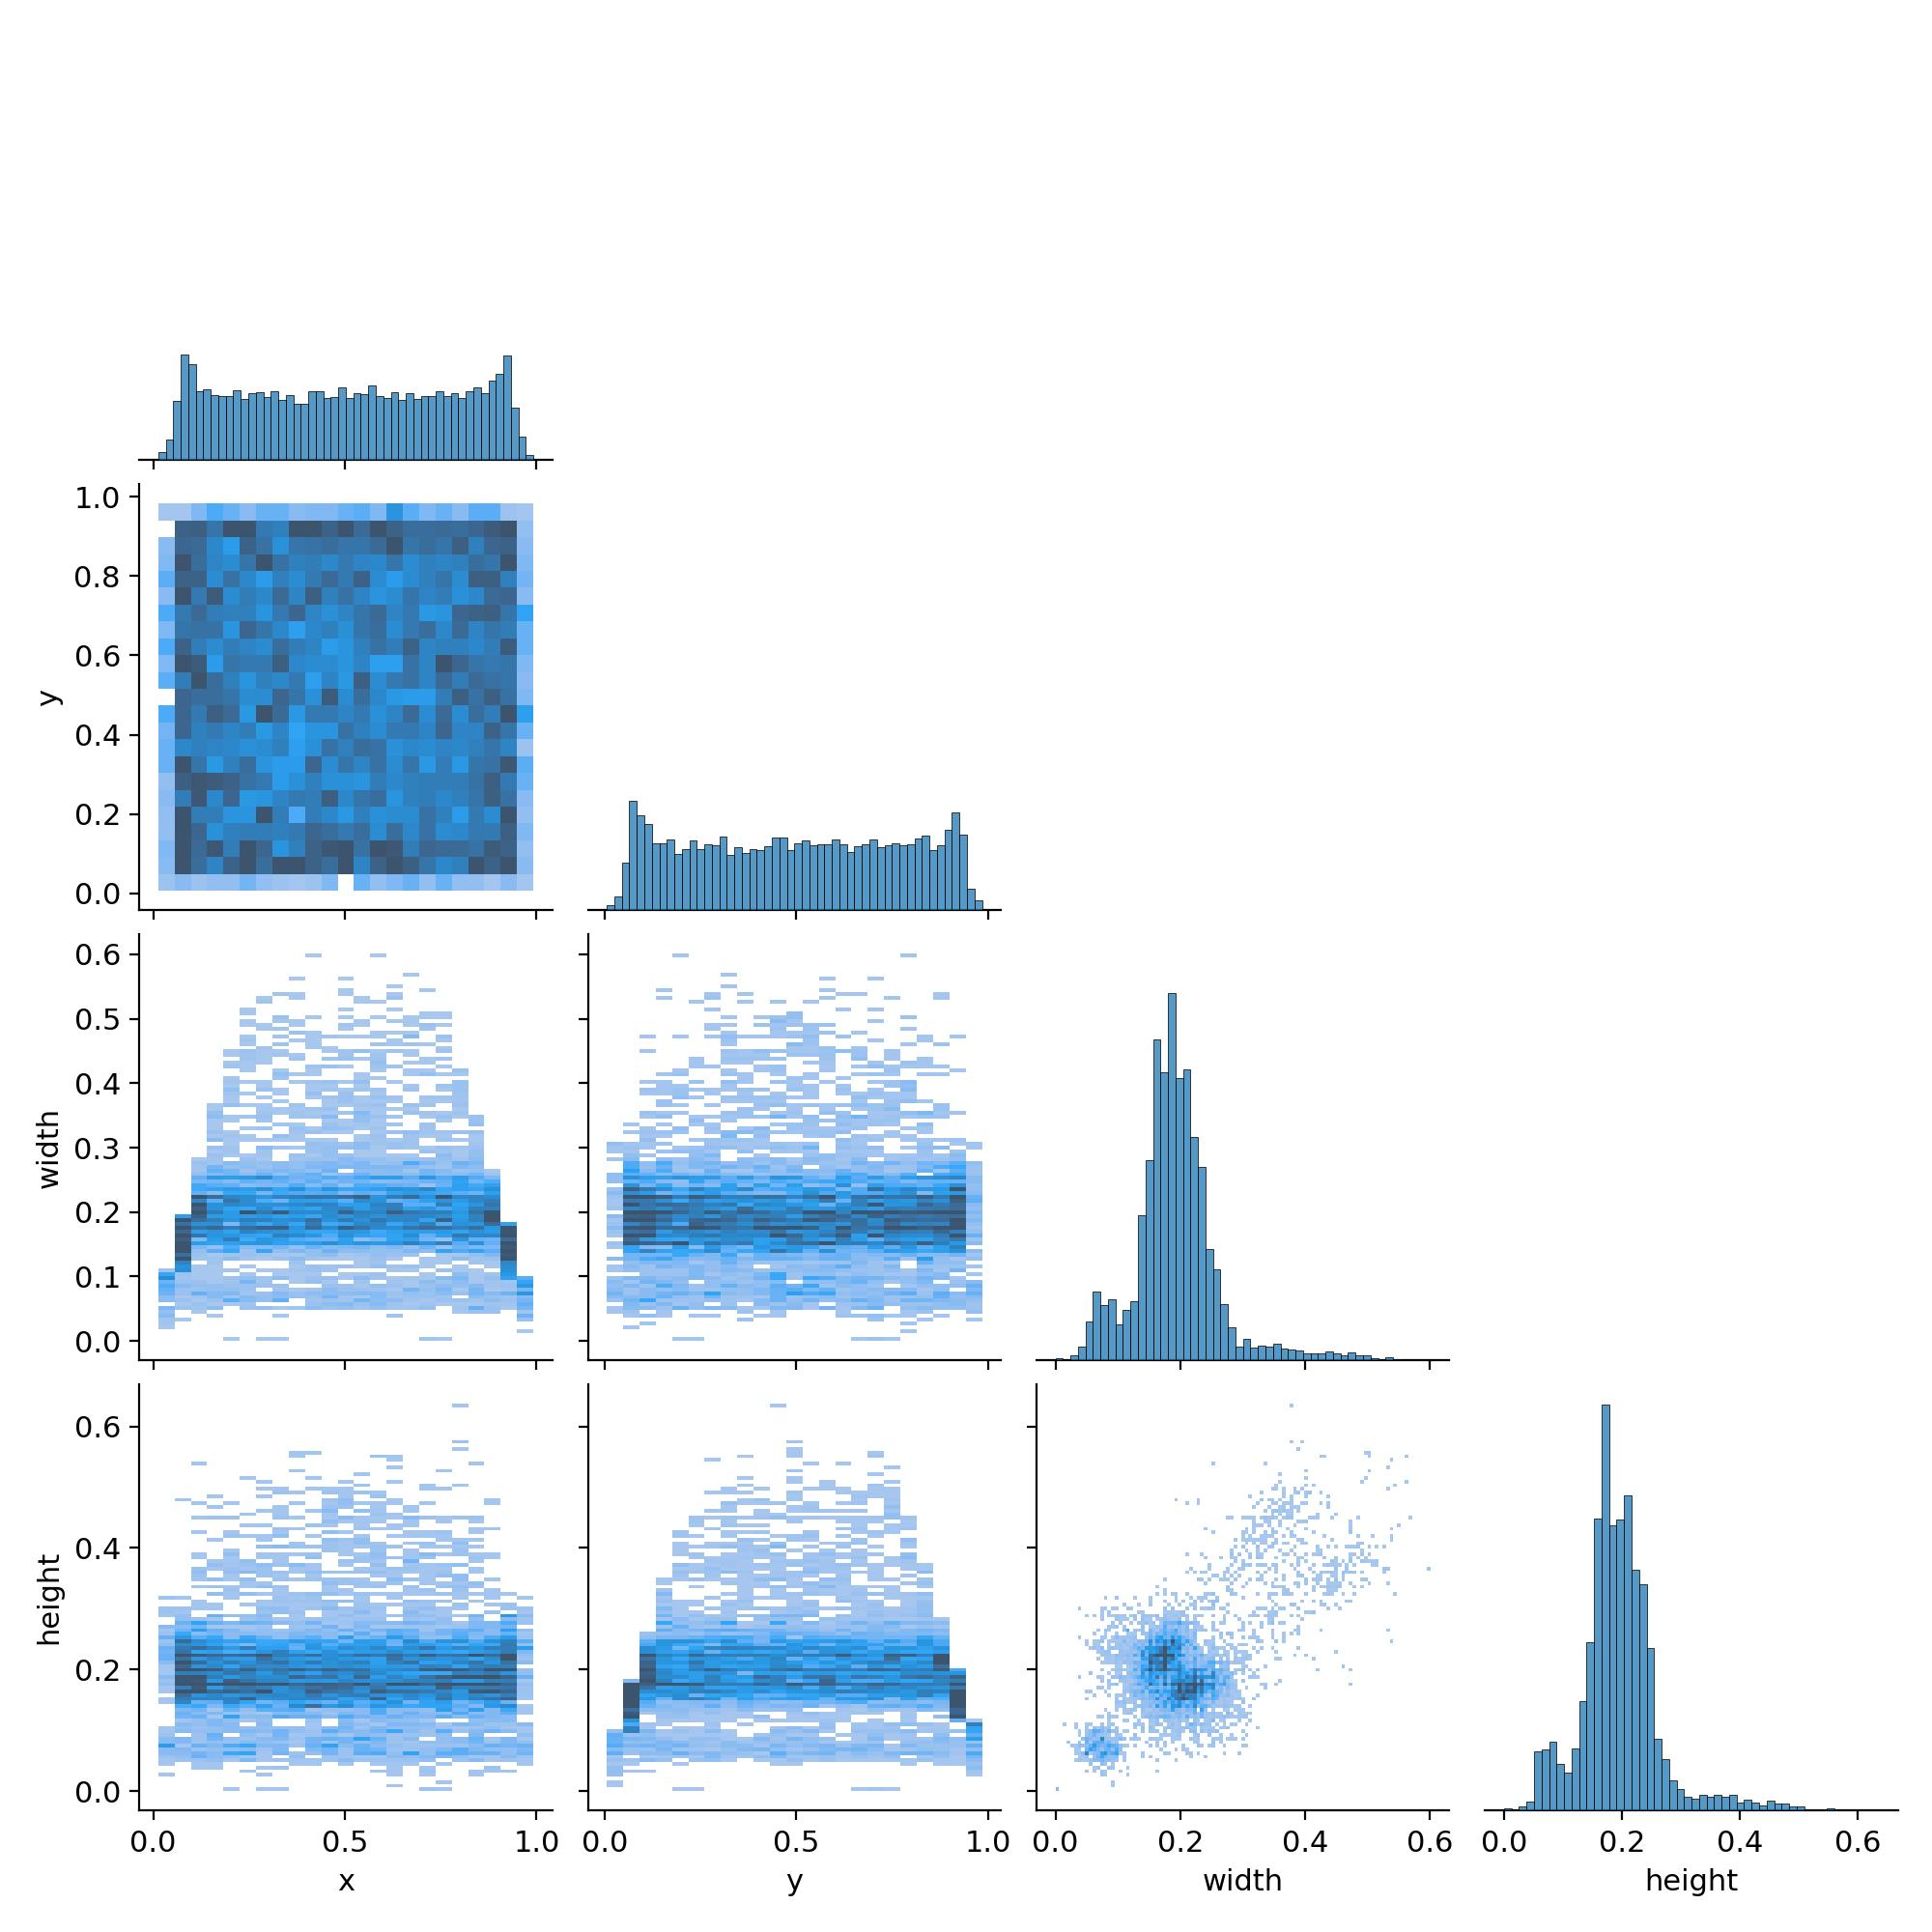

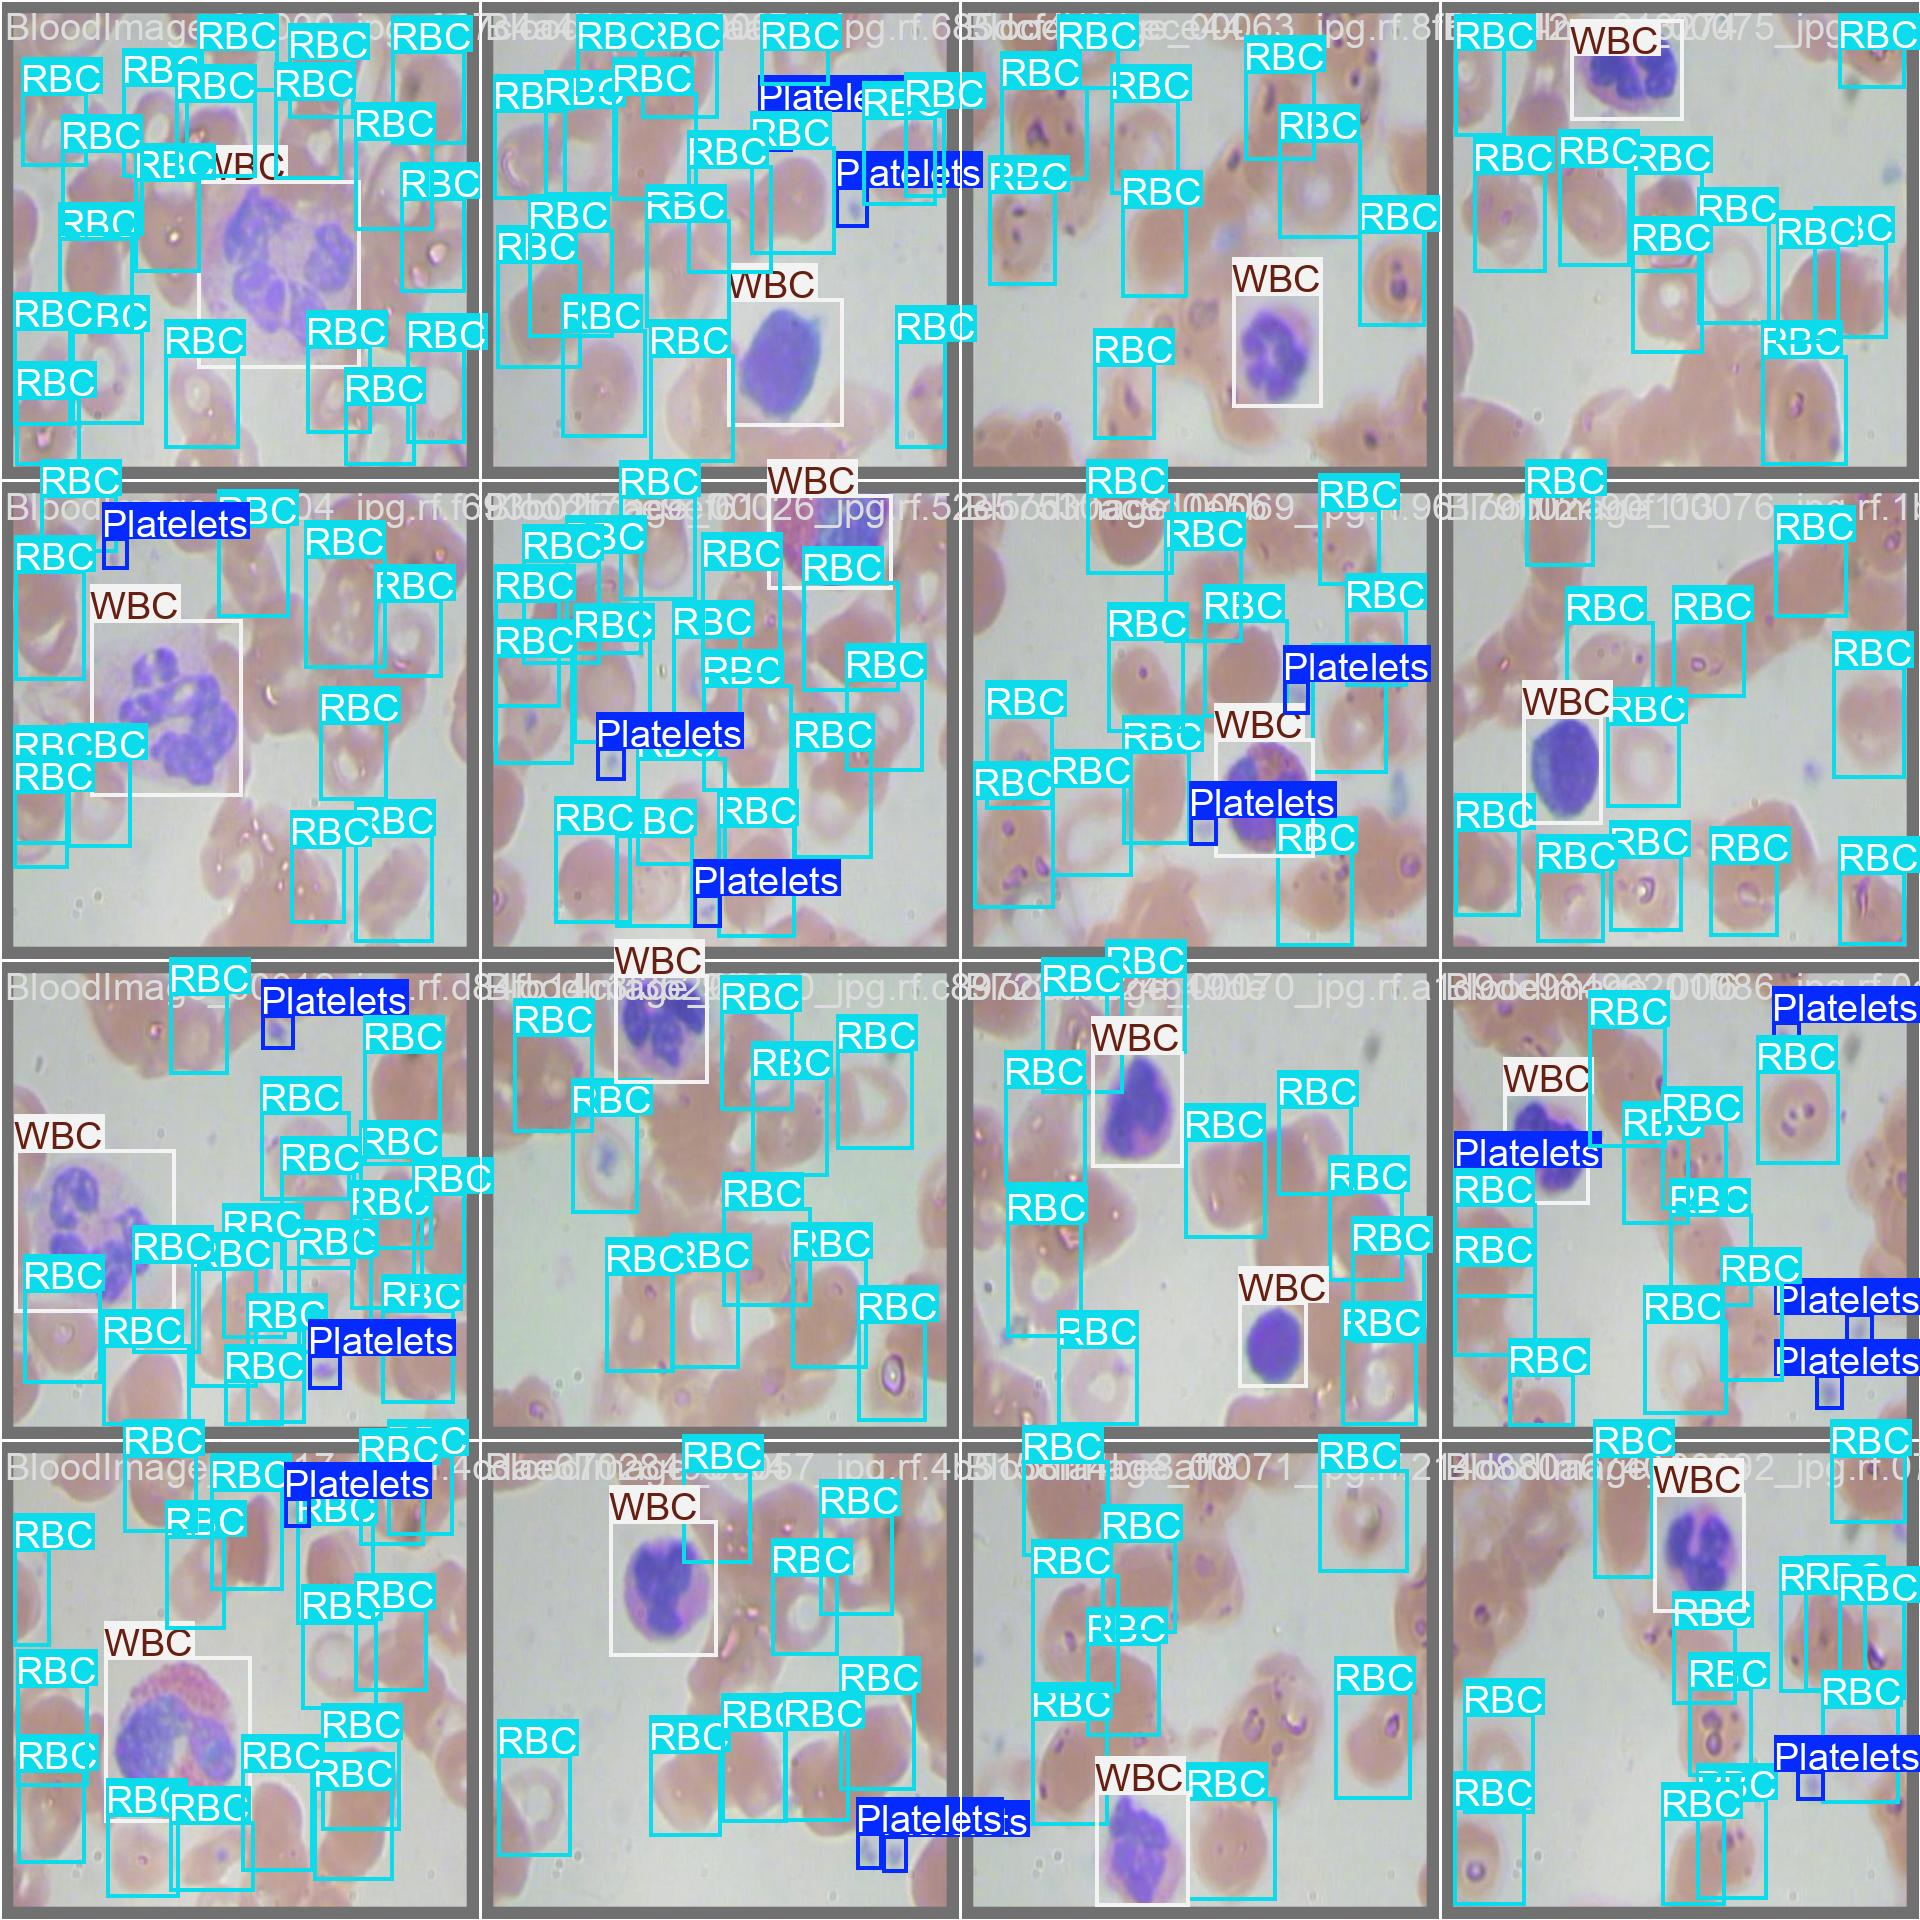

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/train2/*.jpg')[5:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

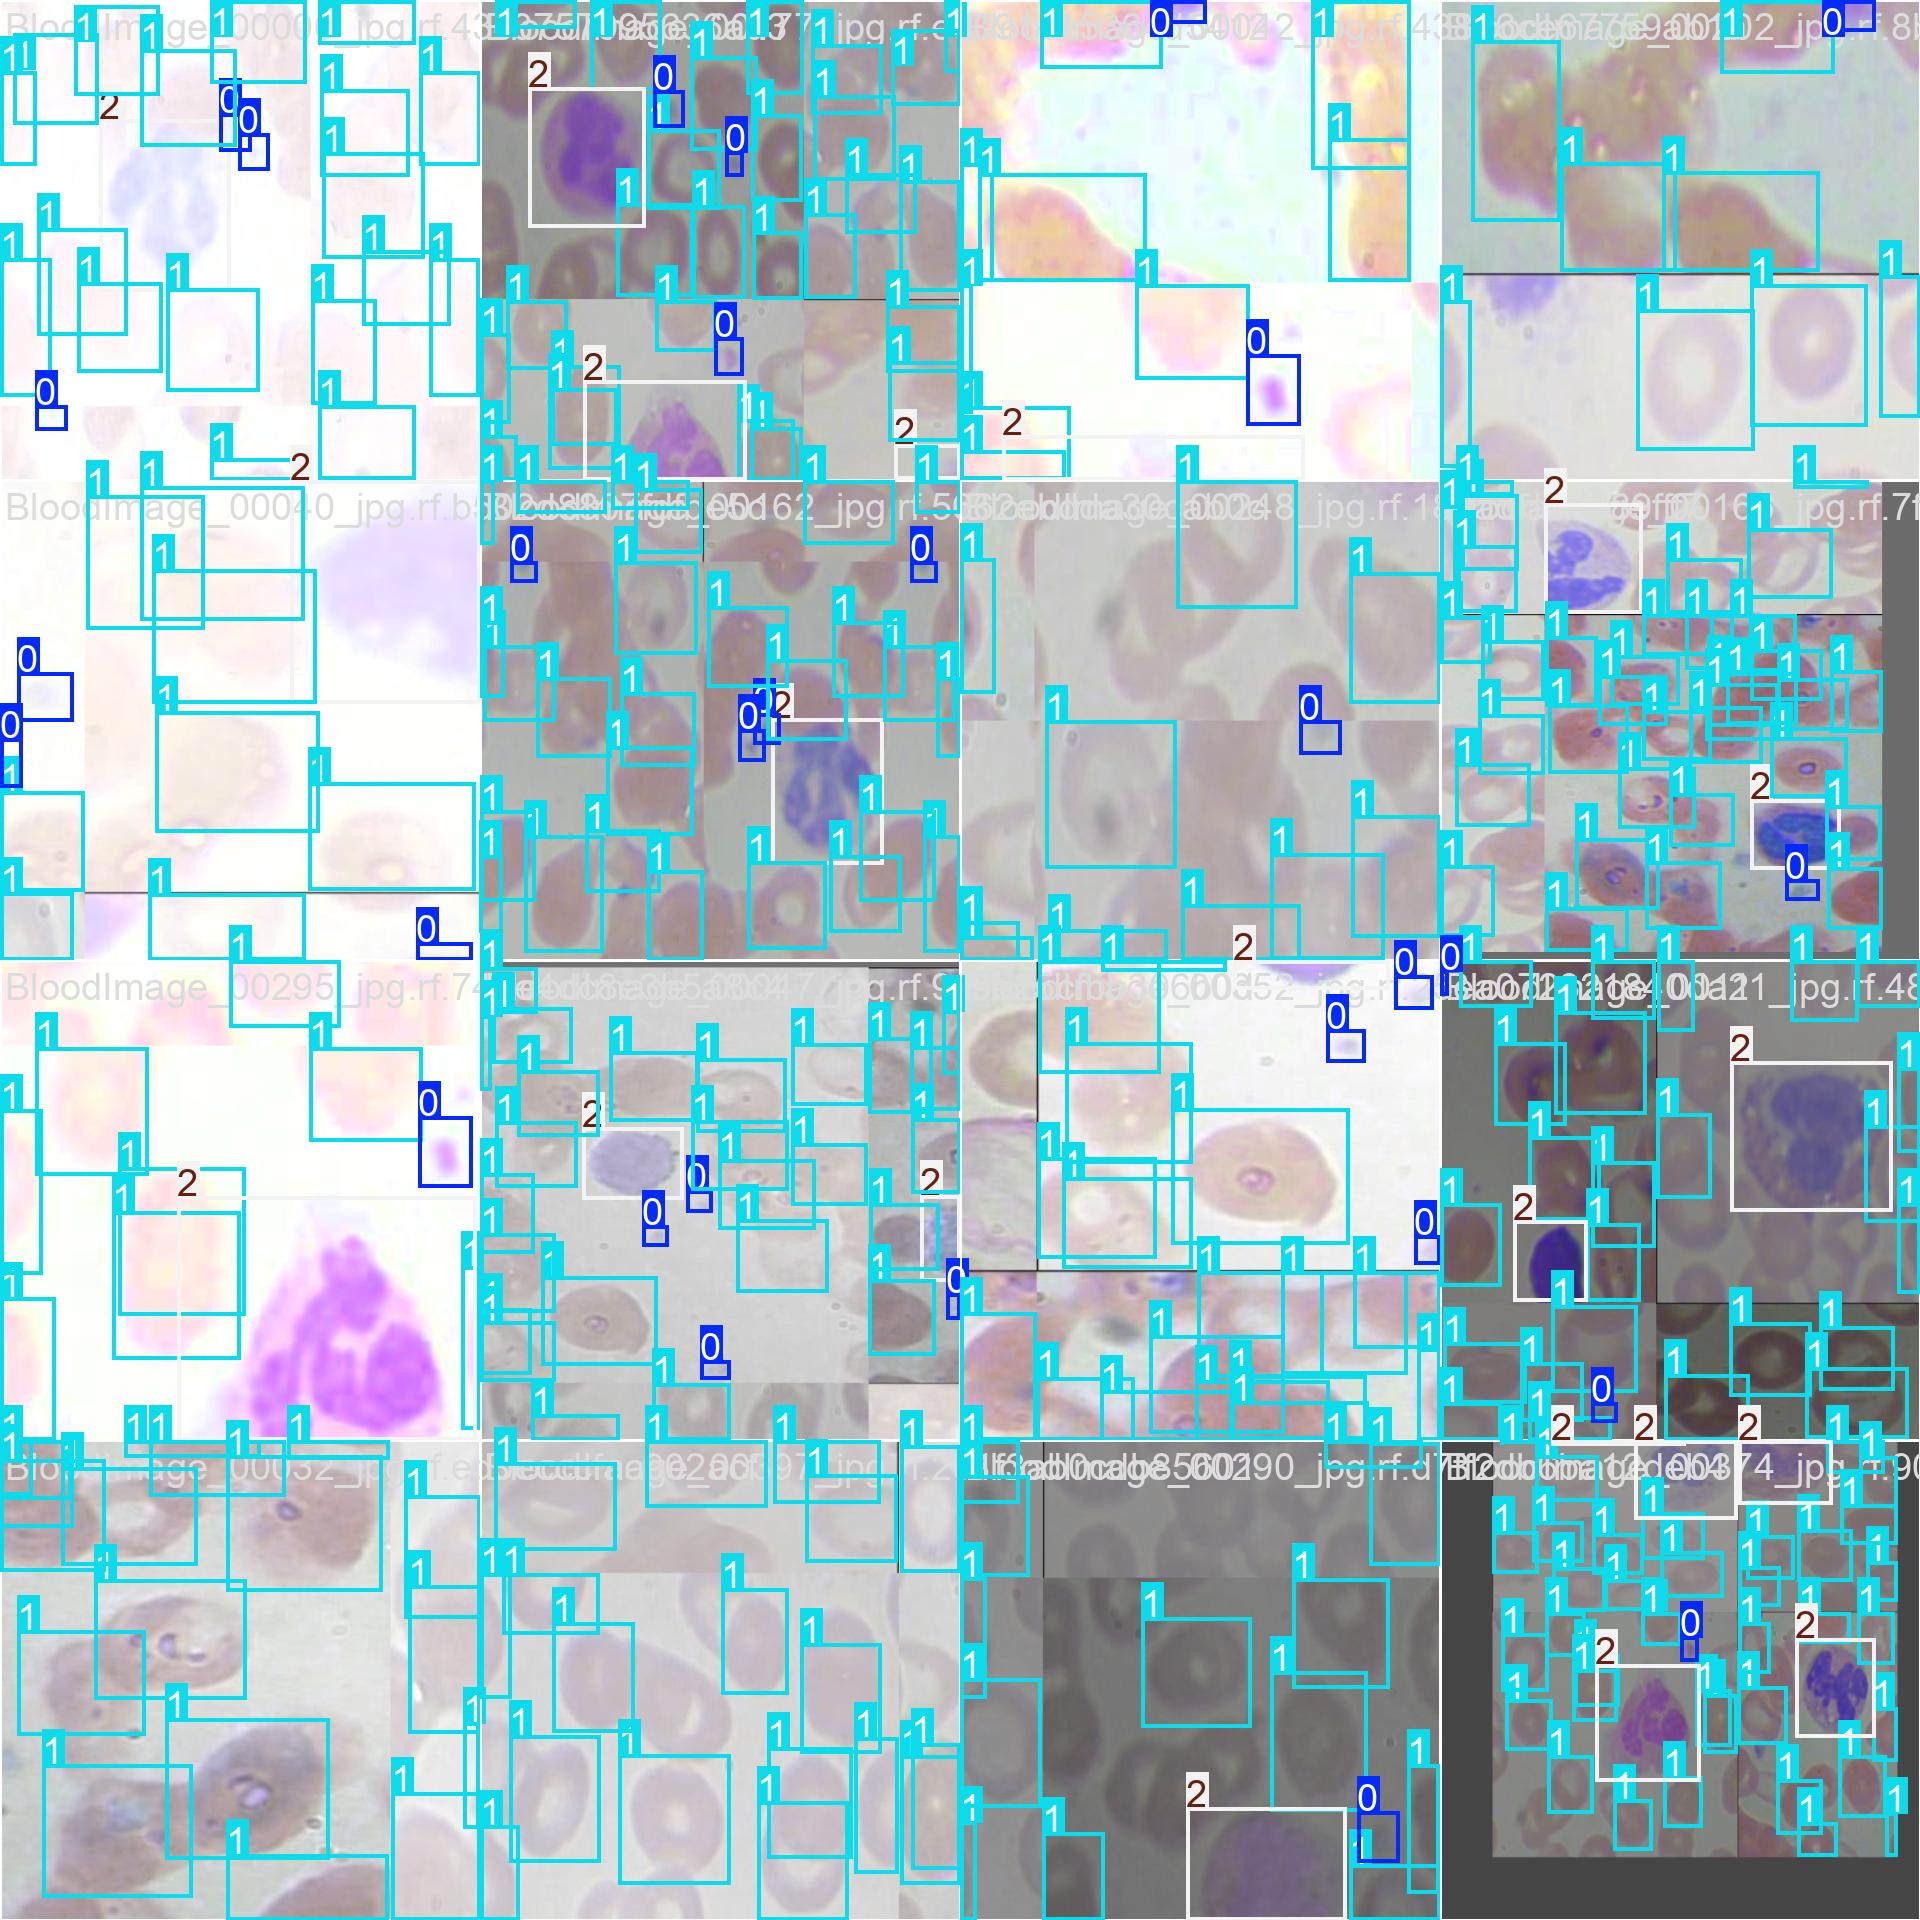

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/train2/*.jpg')[1:2]:
      display(Image(filename=image_path, width=600))
      print("\n")

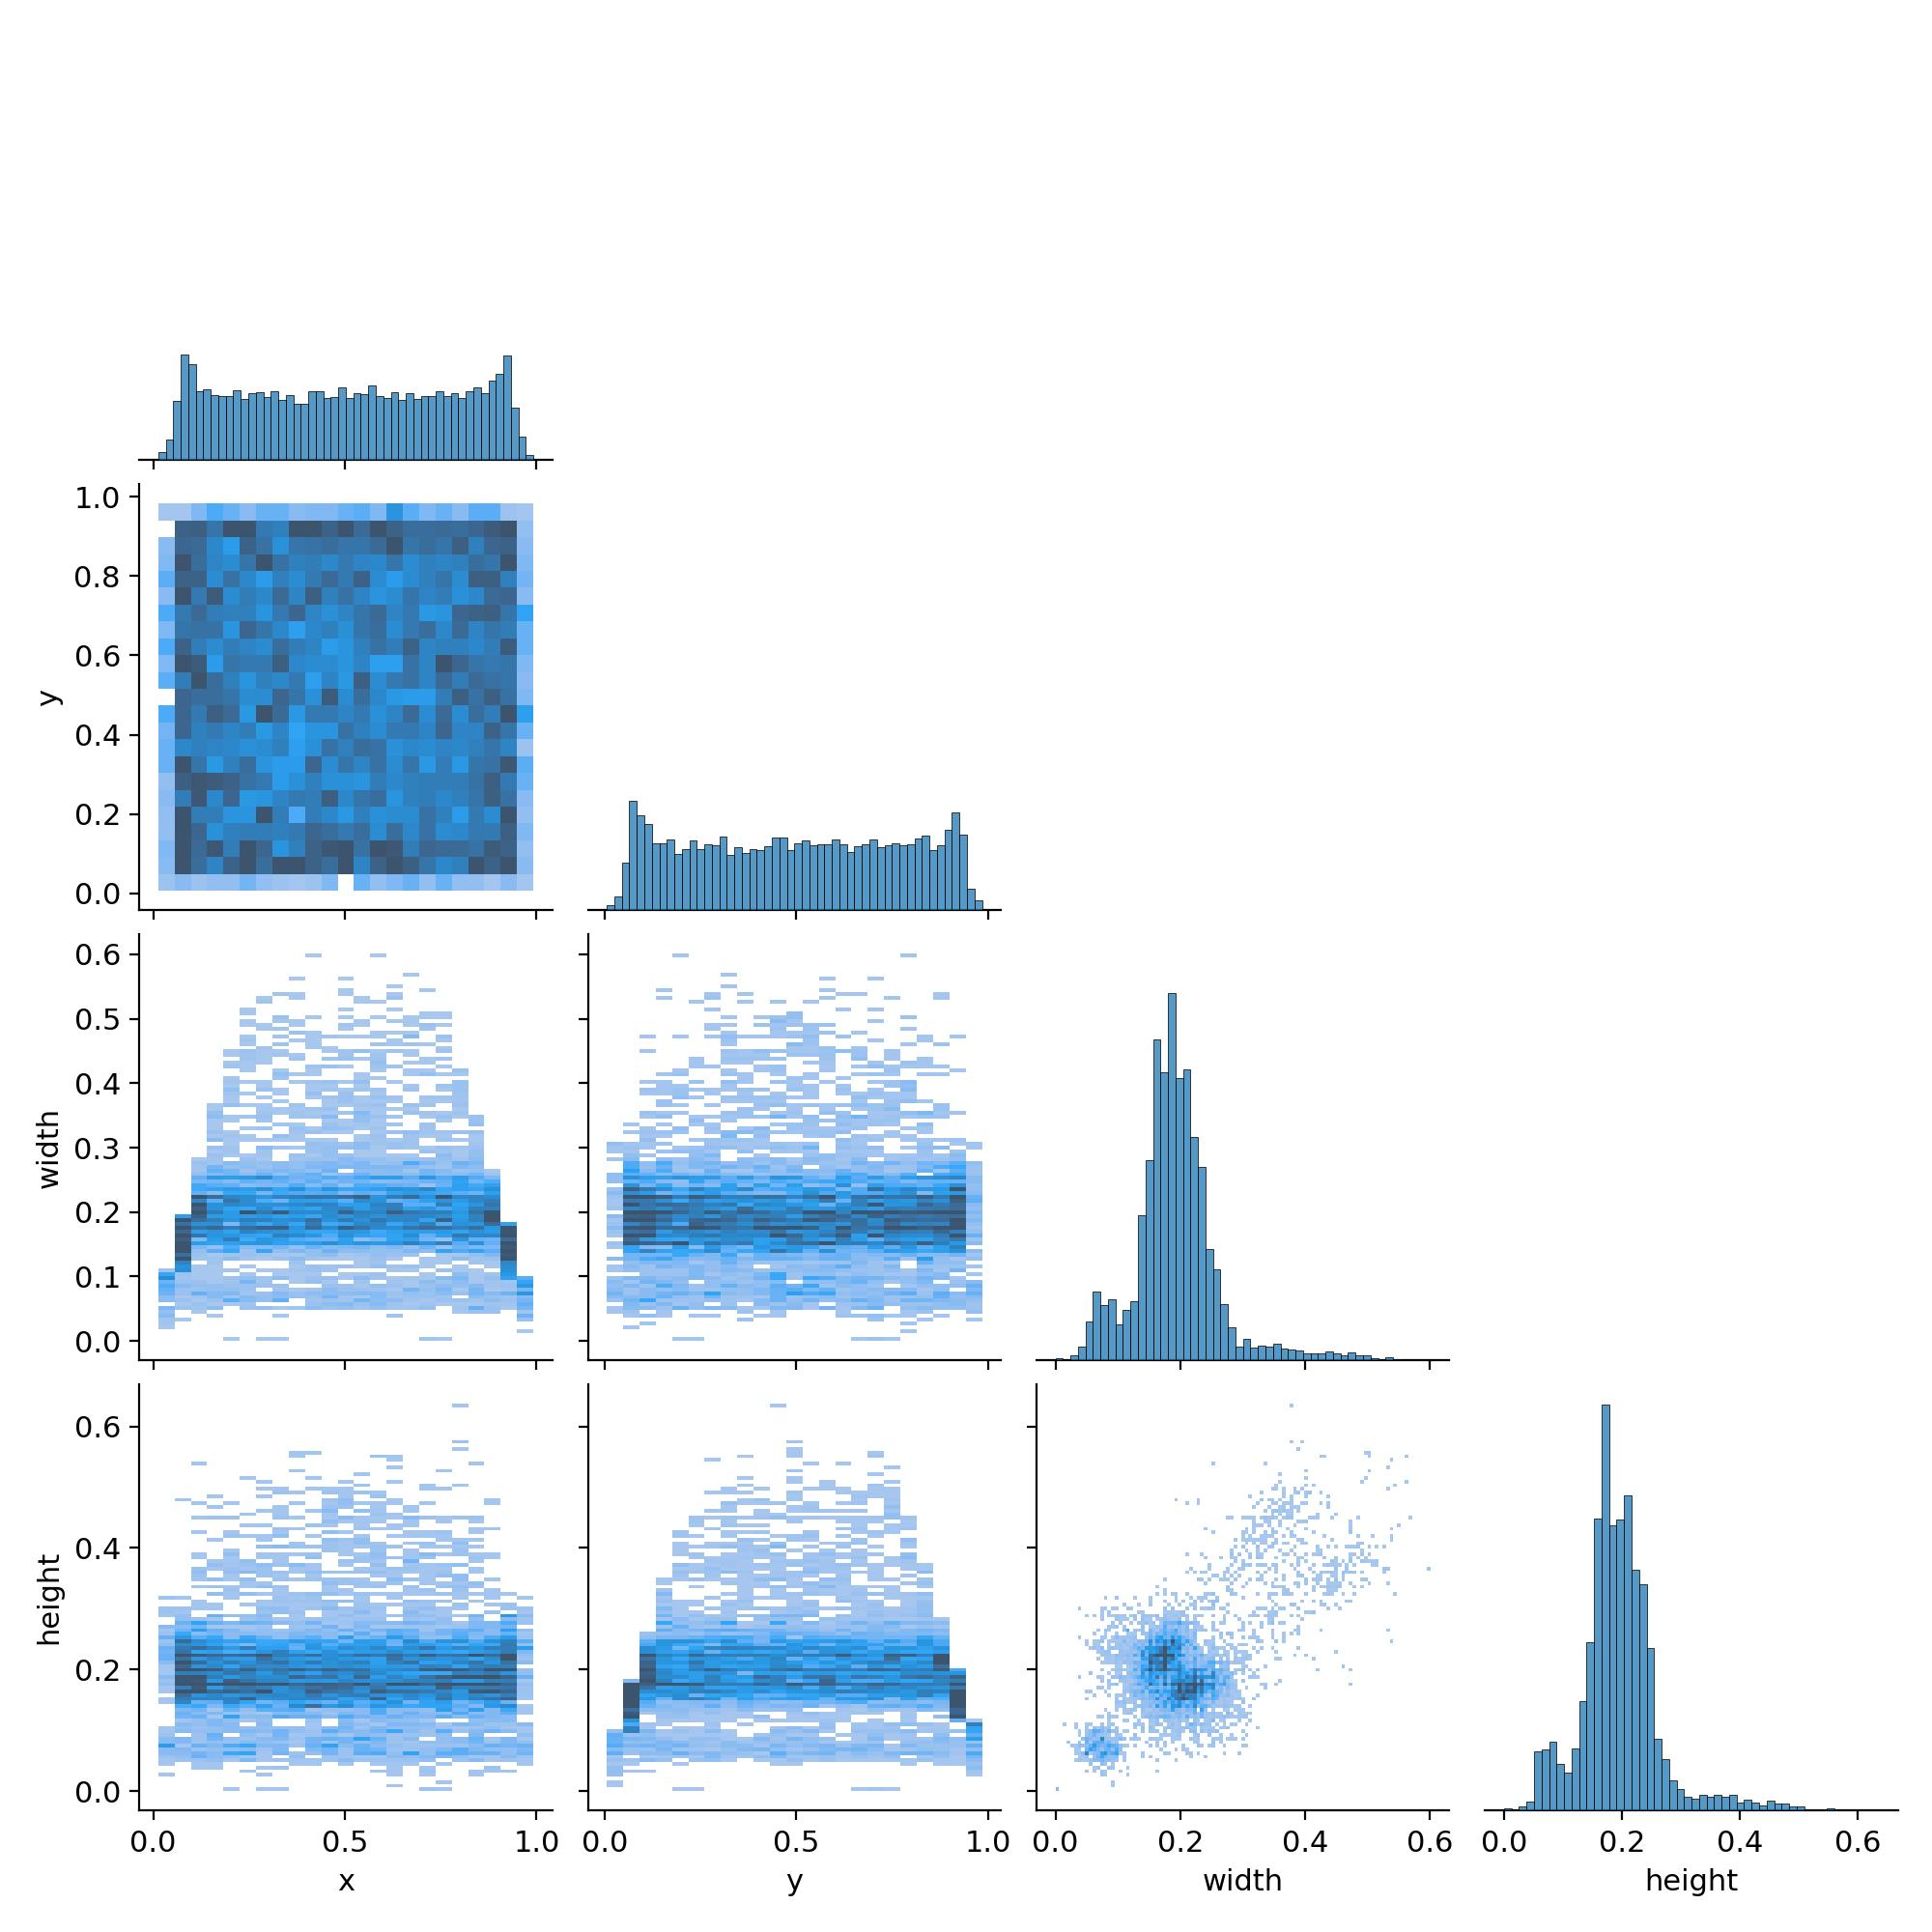

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/labels_correlogram.jpg', width=600)

In [ ]:
import pandas as pd

df = pd.read_csv('/content/runs/detect/train2/results.csv')
df

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1  17.3978         1.37289         1.56042         1.43532   
1      2  30.9954         1.20879         0.94291         1.27785   
2      3  45.3540         1.23418         0.93612         1.28286   
3      4  58.9184         1.16565         0.87798         1.23886   
4      5  72.3450         1.14365         0.82321         1.21992   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.75092            0.83940           0.86400   
1               0.73288            0.83841           0.87350   
2               0.75021            0.80520           0.86962   
3               0.80568            0.86425           0.90021   
4               0.86836            0.91164           0.92144   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.54935       1.17439       1.14212       1.28523  0.000466   
1              0.55228       1.15937       0.91936       1.26022  0.000756   
2              0.55382       1.22333       0.98477       1.30960  0.000857   
3              0.59567       1.10013       0.73172       1.20938  0.000580   
4              0.64743       1.02113       0.65816       1.15733  0.000297   

     lr/pg1    lr/pg2  
0  0.000466  0.000466  
1  0.000756  0.000756  
2  0.000857  0.000857  
3  0.000580  0.000580  
4  0.000297  0.000297